In [2]:
import sqlalchemy 
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from scipy import stats
import seaborn as sns
import pandas as pd
from datetime import time

In [7]:
flights = pd.read_csv('flights.csv',sep=',',index_col=[0]).head(10000)
pd.set_option('display.max_columns', None)
flights.rename(columns={"op_unique_carrier": "unique_carrier"}, inplace =True)
flights[["year", "month", "day"]] = flights["fl_date"].str.split("-", expand = True)
flights['dep_time'] = flights['dep_time']/100
flights['dep_time'] = flights['dep_time'].astype(str)
flights[["hours", "minutes"]] = flights["dep_time"].str.split(".", expand = True)
flights['hours'] = flights['hours'].astype(float)
flights['minutes'] = flights['minutes'].astype(float)
flights['hours'] = flights['hours'].astype('Int64')
flights['minutes'] = flights['minutes'].astype('Int64')
flights

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month,day,hours,minutes
0,2018-10-31,DL,DL,DL,2530,DL,N915DN,2530,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",700,6.54,-6.0,10.0,704.0,828.0,8.0,845,836.0,-9.0,0.0,NaN,0.0,N,105.0,102.0,84.0,1.0,554.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,6,54
1,2018-10-31,DL,DL,DL,2531,DL,N963AT,2531,10397,ATL,"Atlanta, GA",11057,CLT,"Charlotte, NC",1459,14.58,-1.0,15.0,1513.0,1556.0,6.0,1620,1602.0,-18.0,0.0,NaN,0.0,N,81.0,64.0,43.0,1.0,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,14,58
2,2018-10-31,DL,DL,DL,2538,DL,N977AT,2538,12892,LAX,"Los Angeles, CA",14057,PDX,"Portland, OR",2015,20.15,0.0,10.0,2025.0,2234.0,31.0,2240,2305.0,25.0,0.0,NaN,0.0,N,145.0,170.0,129.0,1.0,834.0,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN,2018,10,31,20,15
3,2018-10-31,DL,DL,DL,2539,DL,N987DL,2539,13342,MKE,"Milwaukee, WI",10397,ATL,"Atlanta, GA",825,8.22,-3.0,9.0,831.0,1106.0,10.0,1128,1116.0,-12.0,0.0,NaN,0.0,N,123.0,114.0,95.0,1.0,669.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,8,22
4,2018-10-31,DL,DL,DL,2541,DL,N903DE,2541,10397,ATL,"Atlanta, GA",11423,DSM,"Des Moines, IA",929,9.28,-1.0,11.0,939.0,1032.0,5.0,1036,1037.0,1.0,0.0,NaN,0.0,N,127.0,129.0,113.0,1.0,743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,9,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-12-01,WN,WN,WN,5544,WN,N7822A,5544,13891,ONT,"Ontario, CA",12889,LAS,"Las Vegas, NV",1155,13.2,85.0,10.0,1330.0,1404.0,5.0,1300,1409.0,69.0,0.0,NaN,0.0,N,65.0,49.0,34.0,1.0,197.0,0.0,0.0,0.0,0.0,69.0,NaN,NaN,NaN,NaN,2019,12,01,13,2
9996,2019-12-01,WN,WN,WN,2680,WN,N8568Z,2680,13891,ONT,"Ontario, CA",13232,MDW,"Chicago, IL",635,6.41,6.0,15.0,656.0,1206.0,5.0,1230,1211.0,-19.0,0.0,NaN,0.0,N,235.0,210.0,190.0,1.0,1706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,01,6,41
9997,2019-12-01,WN,WN,WN,1781,WN,N7879A,1781,13891,ONT,"Ontario, CA",13796,OAK,"Oakland, CA",1825,18.48,23.0,13.0,1901.0,2008.0,11.0,1945,2019.0,34.0,0.0,NaN,0.0,N,80.0,91.0,67.0,1.0,362.0,0.0,0.0,34.0,0.0,0.0,NaN,NaN,NaN,NaN,2019,12,01,18,48
9998,2019-12-01,WN,WN,WN,2476,WN,N233LV,2476,13891,ONT,"Ontario, CA",13796,OAK,"Oakland, CA",1955,20.28,33.0,9.0,2037.0,2141.0,31.0,2110,2212.0,62.0,0.0,NaN,0.0,N,75.0,104.0,64.0,1.0,362.0,13.0,0.0,29.0,0.0,20.0,NaN,NaN,NaN,NaN,2019,12,01,20,28


In [14]:
flights_subset = pd.read_csv('flight_subset.csv',sep=',').head(10000)
flights_subset.rename(columns={"op_unique_carrier": "unique_carrier"}, inplace =True)
flights_subset

,Unnamed: 0,avg_arr_delay,unique_carrier,avg_dep_delay,route,month,year
0,0,13.206897,DL,19.965517,10135-10397,1,2018
1,1,-3.000000,EV,3.000000,10135-10397,1,2018
2,2,7.073171,9E,9.365854,10135-10397,1,2019
3,3,-0.923077,DL,3.423077,10135-10397,1,2019
4,4,5.500000,9E,8.600000,10135-10397,2,2018
...,...,...,...,...,...,...,...
9995,9995,0.890909,DL,6.490909,10397-14321,5,2018
9996,9996,-6.854545,DL,1.745455,10397-14321,5,2019
9997,9997,9.378049,DL,15.597561,10397-14321,6,2018
9998,9998,14.597561,DL,20.085366,10397-14321,6,2019


In [15]:
passenger_subset = pd.read_csv('passenger_subset.csv',sep=',').head(10000)
pd.set_option('display.max_columns', None)
passenger_subset

,Unnamed: 0,departures_scheduled,departures_performed,seats,passengers,freight,mail,aircraft_group,aircraft_type,unique_carrier,region,origin_airport_id,dest_airport_id,route,month,year,distance
0,0,26.0,26.0,4732.0,4155.0,0.0,0.0,6,694,NK,D,11292,13487,11292-13487,6,2019,680.0
1,1,26.0,26.0,4732.0,3728.0,0.0,0.0,6,694,NK,D,11433,10423,11433-10423,6,2019,1149.0
2,2,26.0,26.0,4732.0,4173.0,0.0,0.0,6,694,NK,D,11433,13198,11433-13198,6,2019,629.0
3,3,26.0,26.0,4732.0,3874.0,0.0,0.0,6,694,NK,D,11697,15304,11697-15304,6,2019,197.0
4,4,26.0,26.0,4732.0,4291.0,0.0,0.0,6,694,NK,D,12339,12889,12339-12889,6,2019,1590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,28.0,28.0,3584.0,2845.0,0.0,0.0,6,698,AA,D,14986,11298,14986-11298,12,2019,945.0
9996,9996,28.0,28.0,5068.0,3999.0,325.0,3294.0,6,699,AA,D,15304,14107,15304-14107,12,2019,1788.0
9997,9997,28.0,27.0,5507.0,4234.0,347350.0,37441.0,6,626,AA,A,10292,14100,10292-14100,12,2019,3736.0
9998,9998,28.0,28.0,6776.0,5859.0,373927.0,0.0,6,696,AA,A,11435,14100,11435-14100,12,2019,3273.0


In [16]:
fuel_consumption = pd.read_csv('fuel_consumption.csv',sep=',').head(10000)
fuel_consumption

,Unnamed: 0,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,0.0,0.0,163052.0,47060.0,210112.0,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,0.0,260848.0,284362.0,0.0,284362.0,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,3030,12,20377.0,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,0.0,0.0,632636.0,1899102.0,2531738.0,0.0,0.0,0.0,0.0,0.0,0.0,1584314.0,4588387.0,6172701.0,2018
3031,3031,12,20207.0,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3032,3032,12,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,3033,12,20452.0,YX,YX,Republic Airline,2,21048.0,0.0,0.0,0.0,0.0,21048.0,21048.0,0.0,21048.0,50043.0,0.0,0.0,0.0,0.0,50043.0,50043.0,0.0,50043.0,2018


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flights, y, test_size=0.3, random_state=42)

In [6]:
Xtrain = pd.read_csv("X_train1.csv",sep=',')
Xtrain['month'] = pd.DatetimeIndex(Xtrain['fl_date']).month
#Xtrain[["year", "month", "day"]] = Xtrain["fl_date"].str.split("-", expand = True)
Xtrain['dep_time'] = Xtrain['dep_time']/100
Xtrain['dep_time'] = Xtrain['dep_time'].astype(str)
Xtrain[["hours", "minutes"]] = Xtrain["dep_time"].str.split(".", expand = True)
Xtrain.rename(columns={"mkt_unique_carrier": "unique_carrier"}, inplace =True)
Xtrain['hours'] = Xtrain['hours'].astype(int)
Xtrain['minutes'] = Xtrain['minutes'].astype(int)
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights_x,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54
1,2019-12-01,AA,1686,N966NN,11057,"Charlotte, NC",11618,"Newark, NJ",25,0.23,-2.0,13.0,11.0,217,156.0,-21.0,0.0,112.0,93.0,69.0,1.0,529.0,0.0,0.0,0.0,0.0,0.0,Charlotte,NC,Newark,NJ,81.0,12,0,23
2,2019-12-01,UA,3591,N721YX,12339,"Indianapolis, IN",11618,"Newark, NJ",745,8.19,34.0,16.0,15.0,950,1023.0,33.0,0.0,125.0,124.0,93.0,1.0,645.0,33.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Newark,NJ,81.0,12,8,19
3,2019-12-01,NK,938,N606NK,14635,"Fort Myers, FL",10158,"Atlantic City, NJ",1850,18.4,-10.0,19.0,7.0,2113,2109.0,-4.0,0.0,143.0,149.0,123.0,1.0,982.0,0.0,0.0,0.0,0.0,0.0,Fort Myers,FL,Atlantic City,NJ,81.0,12,18,4
4,2019-12-01,NK,218,N687NK,11697,"Fort Lauderdale, FL",10158,"Atlantic City, NJ",735,7.37,2.0,14.0,5.0,1005,1001.0,-4.0,0.0,150.0,144.0,125.0,1.0,977.0,0.0,0.0,0.0,0.0,0.0,Fort Lauderdale,FL,Atlantic City,NJ,81.0,12,7,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,2019-12-01,DL,3466,N8928A,12478,"New York, NY",10785,"Burlington, VT",2200,22.53,53.0,45.0,5.0,2323,30.0,67.0,0.0,83.0,97.0,47.0,1.0,266.0,0.0,0.0,67.0,0.0,0.0,New York,NY,Burlington,VT,5.0,12,22,53
6898,2019-12-01,DL,2855,N381DN,14747,"Seattle, WA",10299,"Anchorage, AK",1135,11.44,9.0,23.0,3.0,1417,1436.0,19.0,0.0,222.0,232.0,206.0,1.0,1448.0,9.0,0.0,10.0,0.0,0.0,Seattle,WA,Anchorage,AK,4.0,12,11,44
6899,2019-12-01,DL,1957,N3754A,14747,"Seattle, WA",10299,"Anchorage, AK",2137,22.08,31.0,11.0,4.0,18,43.0,25.0,0.0,221.0,215.0,200.0,1.0,1448.0,25.0,0.0,0.0,0.0,0.0,Seattle,WA,Anchorage,AK,4.0,12,22,8
6900,2019-12-01,DL,1223,N115DU,14747,"Seattle, WA",11630,"Fairbanks, AK",2059,21.06,7.0,16.0,3.0,2344,2357.0,13.0,0.0,225.0,231.0,212.0,1.0,1533.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Fairbanks,AK,4.0,12,21,6


In [9]:
flights.isnull().sum()
flights.fillna(value=1,inplace=True)
flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
unique_carrier         0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
cancellation_code      0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0


In [10]:
flights

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month,day,hours,minutes
0,2018-10-31,DL,DL,DL,2530,DL,N915DN,2530,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",700,6.54,-6.0,10.0,704.0,828.0,8.0,845,836.0,-9.0,0.0,1,0.0,N,105.0,102.0,84.0,1.0,554.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2018,10,31,6,54
1,2018-10-31,DL,DL,DL,2531,DL,N963AT,2531,10397,ATL,"Atlanta, GA",11057,CLT,"Charlotte, NC",1459,14.58,-1.0,15.0,1513.0,1556.0,6.0,1620,1602.0,-18.0,0.0,1,0.0,N,81.0,64.0,43.0,1.0,226.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2018,10,31,14,58
2,2018-10-31,DL,DL,DL,2538,DL,N977AT,2538,12892,LAX,"Los Angeles, CA",14057,PDX,"Portland, OR",2015,20.15,0.0,10.0,2025.0,2234.0,31.0,2240,2305.0,25.0,0.0,1,0.0,N,145.0,170.0,129.0,1.0,834.0,0.0,0.0,25.0,0.0,0.0,1.0,1.0,1.0,1.0,2018,10,31,20,15
3,2018-10-31,DL,DL,DL,2539,DL,N987DL,2539,13342,MKE,"Milwaukee, WI",10397,ATL,"Atlanta, GA",825,8.22,-3.0,9.0,831.0,1106.0,10.0,1128,1116.0,-12.0,0.0,1,0.0,N,123.0,114.0,95.0,1.0,669.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2018,10,31,8,22
4,2018-10-31,DL,DL,DL,2541,DL,N903DE,2541,10397,ATL,"Atlanta, GA",11423,DSM,"Des Moines, IA",929,9.28,-1.0,11.0,939.0,1032.0,5.0,1036,1037.0,1.0,0.0,1,0.0,N,127.0,129.0,113.0,1.0,743.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2018,10,31,9,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-12-01,WN,WN,WN,5544,WN,N7822A,5544,13891,ONT,"Ontario, CA",12889,LAS,"Las Vegas, NV",1155,13.2,85.0,10.0,1330.0,1404.0,5.0,1300,1409.0,69.0,0.0,1,0.0,N,65.0,49.0,34.0,1.0,197.0,0.0,0.0,0.0,0.0,69.0,1.0,1.0,1.0,1.0,2019,12,01,13,2
9996,2019-12-01,WN,WN,WN,2680,WN,N8568Z,2680,13891,ONT,"Ontario, CA",13232,MDW,"Chicago, IL",635,6.41,6.0,15.0,656.0,1206.0,5.0,1230,1211.0,-19.0,0.0,1,0.0,N,235.0,210.0,190.0,1.0,1706.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2019,12,01,6,41
9997,2019-12-01,WN,WN,WN,1781,WN,N7879A,1781,13891,ONT,"Ontario, CA",13796,OAK,"Oakland, CA",1825,18.48,23.0,13.0,1901.0,2008.0,11.0,1945,2019.0,34.0,0.0,1,0.0,N,80.0,91.0,67.0,1.0,362.0,0.0,0.0,34.0,0.0,0.0,1.0,1.0,1.0,1.0,2019,12,01,18,48
9998,2019-12-01,WN,WN,WN,2476,WN,N233LV,2476,13891,ONT,"Ontario, CA",13796,OAK,"Oakland, CA",1955,20.28,33.0,9.0,2037.0,2141.0,31.0,2110,2212.0,62.0,0.0,1,0.0,N,75.0,104.0,64.0,1.0,362.0,13.0,0.0,29.0,0.0,20.0,1.0,1.0,1.0,1.0,2019,12,01,20,28


In [10]:

conditions = [
    (Xtrain['hours'] >= 0) & (Xtrain['hours'] <= 6),
    (Xtrain['hours'] <= 12),
    (Xtrain['hours'] > 12) & (Xtrain['hours'] <= 18),
    (Xtrain['hours'] > 18) & (Xtrain['hours'] <= 24)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4']

# create a new column and use np.select to assign values to it using our lists as arguments
Xtrain['time_slot'] = np.select(conditions, values)

# display updated DataFrame
pd.set_option('display.max_columns', None)
Xtrain.head(10)

NameError: name 'Xtrain' is not defined

In [11]:
flights = flights['hours'].fillna('')
conditions = [
    (flights['hours'] >= 1) & (flights['hours'] <= 6),
    (flights['hours'] <= 12),
    (flights['hours'] > 12) & (flights['hours'] <= 18),
    (flights['hours'] > 18) & (flights['hours'] <= 24)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4']

# create a new column and use np.select to assign values to it using our lists as arguments
flights['time_slot'] = np.select(conditions, values)

# display updated DataFrame
pd.set_option('display.max_columns', None)
flights.head(10)

KeyError: 'hours'

In [44]:
conditions = [
    (flights['distance'] <= 1000),
    (flights['distance'] > 1000) & (flights['distance'] <= 2000),
    (flights['distance'] > 2000)
    ]

# create a list of the values we want to assign for each condition
values = ['short', 'medium', 'long']

# create a new column and use np.select to assign values to it using our lists as arguments
flights['haul_duration'] = np.select(conditions, values)

# display updated DataFrame
pd.set_option('display.max_columns', None)
flights.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month,day,haul_duration
0,2018-10-31,DL,DL,DL,2530,DL,N915DN,2530,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",700,654.0,-6.0,10.0,704.0,828.0,8.0,845,836.0,-9.0,0.0,NaN,0.0,N,105.0,102.0,84.0,1.0,554.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short
1,2018-10-31,DL,DL,DL,2531,DL,N963AT,2531,10397,ATL,"Atlanta, GA",11057,CLT,"Charlotte, NC",1459,1458.0,-1.0,15.0,1513.0,1556.0,6.0,1620,1602.0,-18.0,0.0,NaN,0.0,N,81.0,64.0,43.0,1.0,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short
2,2018-10-31,DL,DL,DL,2538,DL,N977AT,2538,12892,LAX,"Los Angeles, CA",14057,PDX,"Portland, OR",2015,2015.0,0.0,10.0,2025.0,2234.0,31.0,2240,2305.0,25.0,0.0,NaN,0.0,N,145.0,170.0,129.0,1.0,834.0,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN,2018,10,31,short
3,2018-10-31,DL,DL,DL,2539,DL,N987DL,2539,13342,MKE,"Milwaukee, WI",10397,ATL,"Atlanta, GA",825,822.0,-3.0,9.0,831.0,1106.0,10.0,1128,1116.0,-12.0,0.0,NaN,0.0,N,123.0,114.0,95.0,1.0,669.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short
4,2018-10-31,DL,DL,DL,2541,DL,N903DE,2541,10397,ATL,"Atlanta, GA",11423,DSM,"Des Moines, IA",929,928.0,-1.0,11.0,939.0,1032.0,5.0,1036,1037.0,1.0,0.0,NaN,0.0,N,127.0,129.0,113.0,1.0,743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short
5,2018-10-31,DL,DL,DL,2541,DL,N903DE,2541,11423,DSM,"Des Moines, IA",10397,ATL,"Atlanta, GA",1426,1418.0,-8.0,10.0,1428.0,1709.0,6.0,1730,1715.0,-15.0,0.0,NaN,0.0,N,124.0,117.0,101.0,1.0,743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short
6,2018-10-31,DL,DL,DL,2543,DL,N344NW,2543,11278,DCA,"Washington, DC",13487,MSP,"Minneapolis, MN",1100,1058.0,-2.0,11.0,1109.0,1228.0,3.0,1237,1231.0,-6.0,0.0,NaN,0.0,N,157.0,153.0,139.0,1.0,931.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short
7,2018-10-31,DL,DL,DL,2544,DL,N6701,2544,10397,ATL,"Atlanta, GA",13204,MCO,"Orlando, FL",1550,1549.0,-1.0,12.0,1601.0,1707.0,12.0,1716,1719.0,3.0,0.0,NaN,0.0,N,86.0,90.0,66.0,1.0,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short
8,2018-10-31,DL,DL,DL,2545,DL,N815DN,2545,10721,BOS,"Boston, MA",11433,DTW,"Detroit, MI",705,658.0,-7.0,19.0,717.0,903.0,7.0,922,910.0,-12.0,0.0,NaN,0.0,N,137.0,132.0,106.0,1.0,632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short
9,2018-10-31,DL,DL,DL,2546,DL,N890DN,2546,14869,SLC,"Salt Lake City, UT",14679,SAN,"San Diego, CA",2035,2031.0,-4.0,18.0,2049.0,2106.0,9.0,2132,2115.0,-17.0,0.0,NaN,0.0,N,117.0,104.0,77.0,1.0,626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,31,short


In [25]:
Xtrain = Xtrain.merge(passengers_per_carrier, on = ["month","unique_carrier"], how = 'inner')
Xtrain = Xtrain.merge(distance_per_carrier, on = ["month","mkt_carrier_fl_num"], how = 'inner')
Xtrain = Xtrain.merge(Monthly_Avg_Delay, on = ["month","mkt_carrier_fl_num"], how = 'inner')
Xtrain = Xtrain.merge(passengers_per_airport, on = "origin_airport_id", how = 'inner')
Xtrain = Xtrain.merge(delay_per_airport, on = "dest_airport_id", how = 'inner')
Xtrain.rename(columns={"arr_delay_x": "arr_delay"}, inplace =True)
Xtrain.rename(columns={"arr_delay_y": "delay_per_airport"}, inplace =True)
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay_x,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes,time_slot,passengers_x,distance_y,dep_delay_y,passengers_y,delay_per_airport
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429
1,2019-12-01,UA,3593,N639RW,11193,"Cincinnati, OH",11618,"Newark, NJ",545,6.04,19.0,12.0,7.0,747,747.0,0.0,0.0,122.0,103.0,84.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,6,4,1,3808.6,569.0,19.0,70,81.371429
2,2019-12-01,UA,3591,N721YX,12339,"Indianapolis, IN",11618,"Newark, NJ",745,8.19,34.0,16.0,15.0,950,1023.0,33.0,0.0,125.0,124.0,93.0,1.0,645.0,33.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Newark,NJ,81.0,12,8,19,2,3808.6,645.0,34.0,121,81.371429
3,2019-12-01,UA,3582,N731YX,11066,"Columbus, OH",11618,"Newark, NJ",1845,20.39,114.0,49.0,6.0,2046,2301.0,135.0,0.0,121.0,142.0,87.0,1.0,463.0,0.0,0.0,135.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,20,39,4,3808.6,463.0,114.0,67,81.371429
4,2019-12-01,UA,3428,N730YX,11066,"Columbus, OH",11618,"Newark, NJ",725,7.21,-4.0,19.0,12.0,913,909.0,-4.0,0.0,108.0,108.0,77.0,1.0,463.0,0.0,0.0,0.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,7,21,2,3808.6,646.3,42.0,67,81.371429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2019-12-01,WN,2226,N8324A,12173,"Honolulu, HI",12758,"Kona, HI",2025,21.48,83.0,11.0,2.0,2120,2230.0,70.0,0.0,55.0,42.0,29.0,1.0,163.0,0.0,0.0,0.0,0.0,70.0,Honolulu,HI,Kona,HI,34.0,12,21,48,4,3589.4,515.5,59.0,41,-1.000000
6872,2019-12-01,DL,2855,N381DN,14747,"Seattle, WA",10299,"Anchorage, AK",1135,11.44,9.0,23.0,3.0,1417,1436.0,19.0,0.0,222.0,232.0,206.0,1.0,1448.0,9.0,0.0,10.0,0.0,0.0,Seattle,WA,Anchorage,AK,4.0,12,11,44,2,3774.1,1448.0,11.5,130,8.333333
6873,2019-12-01,DL,1957,N3754A,14747,"Seattle, WA",10299,"Anchorage, AK",2137,22.08,31.0,11.0,4.0,18,43.0,25.0,0.0,221.0,215.0,200.0,1.0,1448.0,25.0,0.0,0.0,0.0,0.0,Seattle,WA,Anchorage,AK,4.0,12,22,8,4,3774.1,1448.0,31.0,130,8.333333
6874,2018-10-31,DL,2855,N387DA,14747,"Seattle, WA",10299,"Anchorage, AK",1225,12.19,-6.0,14.0,3.0,1523,1504.0,-19.0,0.0,238.0,225.0,208.0,1.0,1448.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Anchorage,AK,4.0,10,12,19,2,4045.5,1448.0,-4.0,130,8.333333


In [26]:
Xtrain = Xtrain.merge(delay_per_city, on = "dest_airport_id", how = 'inner')
Xtrain.rename(columns={"dep_delay_x": "dep_delay"}, inplace =True)
Xtrain.rename(columns={"dep_delay_y": "delay_per_city"}, inplace =True)
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429,5189.0
1,2019-12-01,UA,3593,N639RW,11193,"Cincinnati, OH",11618,"Newark, NJ",545,6.04,19.0,12.0,7.0,747,747.0,0.0,0.0,122.0,103.0,84.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,6,4,1,3808.6,569.0,19.0,70,81.371429,5189.0
2,2019-12-01,UA,3591,N721YX,12339,"Indianapolis, IN",11618,"Newark, NJ",745,8.19,34.0,16.0,15.0,950,1023.0,33.0,0.0,125.0,124.0,93.0,1.0,645.0,33.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Newark,NJ,81.0,12,8,19,2,3808.6,645.0,34.0,121,81.371429,5189.0
3,2019-12-01,UA,3582,N731YX,11066,"Columbus, OH",11618,"Newark, NJ",1845,20.39,114.0,49.0,6.0,2046,2301.0,135.0,0.0,121.0,142.0,87.0,1.0,463.0,0.0,0.0,135.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,20,39,4,3808.6,463.0,114.0,67,81.371429,5189.0
4,2019-12-01,UA,3428,N730YX,11066,"Columbus, OH",11618,"Newark, NJ",725,7.21,-4.0,19.0,12.0,913,909.0,-4.0,0.0,108.0,108.0,77.0,1.0,463.0,0.0,0.0,0.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,7,21,2,3808.6,646.3,42.0,67,81.371429,5189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2019-12-01,WN,2226,N8324A,12173,"Honolulu, HI",12758,"Kona, HI",2025,21.48,83.0,11.0,2.0,2120,2230.0,70.0,0.0,55.0,42.0,29.0,1.0,163.0,0.0,0.0,0.0,0.0,70.0,Honolulu,HI,Kona,HI,34.0,12,21,48,4,3589.4,515.5,59.0,41,-1.000000,88.0
6872,2019-12-01,DL,2855,N381DN,14747,"Seattle, WA",10299,"Anchorage, AK",1135,11.44,9.0,23.0,3.0,1417,1436.0,19.0,0.0,222.0,232.0,206.0,1.0,1448.0,9.0,0.0,10.0,0.0,0.0,Seattle,WA,Anchorage,AK,4.0,12,11,44,2,3774.1,1448.0,11.5,130,8.333333,34.0
6873,2019-12-01,DL,1957,N3754A,14747,"Seattle, WA",10299,"Anchorage, AK",2137,22.08,31.0,11.0,4.0,18,43.0,25.0,0.0,221.0,215.0,200.0,1.0,1448.0,25.0,0.0,0.0,0.0,0.0,Seattle,WA,Anchorage,AK,4.0,12,22,8,4,3774.1,1448.0,31.0,130,8.333333,34.0
6874,2018-10-31,DL,2855,N387DA,14747,"Seattle, WA",10299,"Anchorage, AK",1225,12.19,-6.0,14.0,3.0,1523,1504.0,-19.0,0.0,238.0,225.0,208.0,1.0,1448.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Anchorage,AK,4.0,10,12,19,2,4045.5,1448.0,-4.0,130,8.333333,34.0


In [27]:
Xtrain = Xtrain.merge(fuel_consumption_per_carrier, on = ["month","unique_carrier"], how = 'inner')
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429,5189.0,1.100734e+09
1,2019-12-01,UA,3593,N639RW,11193,"Cincinnati, OH",11618,"Newark, NJ",545,6.04,19.0,12.0,7.0,747,747.0,0.0,0.0,122.0,103.0,84.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,6,4,1,3808.6,569.0,19.0,70,81.371429,5189.0,1.100734e+09
2,2019-12-01,UA,3591,N721YX,12339,"Indianapolis, IN",11618,"Newark, NJ",745,8.19,34.0,16.0,15.0,950,1023.0,33.0,0.0,125.0,124.0,93.0,1.0,645.0,33.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Newark,NJ,81.0,12,8,19,2,3808.6,645.0,34.0,121,81.371429,5189.0,1.100734e+09
3,2019-12-01,UA,3582,N731YX,11066,"Columbus, OH",11618,"Newark, NJ",1845,20.39,114.0,49.0,6.0,2046,2301.0,135.0,0.0,121.0,142.0,87.0,1.0,463.0,0.0,0.0,135.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,20,39,4,3808.6,463.0,114.0,67,81.371429,5189.0,1.100734e+09
4,2019-12-01,UA,3428,N730YX,11066,"Columbus, OH",11618,"Newark, NJ",725,7.21,-4.0,19.0,12.0,913,909.0,-4.0,0.0,108.0,108.0,77.0,1.0,463.0,0.0,0.0,0.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,7,21,2,3808.6,646.3,42.0,67,81.371429,5189.0,1.100734e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2018-10-31,AA,2223,N868NN,11298,"Dallas/Fort Worth, TX",13930,"Chicago, IL",1437,14.42,5.0,15.0,29.0,1706,1708.0,2.0,0.0,149.0,146.0,102.0,1.0,801.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Chicago,IL,289.0,10,14,42,3,3848.1,801.0,5.0,208,14.313609,2533.0,1.202771e+09
6872,2018-10-31,AA,2203,N848NN,11298,"Dallas/Fort Worth, TX",13487,"Minneapolis, MN",1215,12.1,-5.0,59.0,6.0,1434,1459.0,25.0,0.0,139.0,169.0,104.0,1.0,852.0,0.0,0.0,25.0,0.0,0.0,Dallas/Fort Worth,TX,Minneapolis,MN,211.0,10,12,1,2,3848.1,852.0,18.0,208,17.100962,4926.0,1.202771e+09
6873,2018-10-31,AA,2200,N985NN,12892,"Los Angeles, CA",10423,"Austin, TX",745,7.45,0.0,13.0,3.0,1241,1227.0,-14.0,0.0,176.0,162.0,146.0,1.0,1242.0,0.0,0.0,0.0,0.0,0.0,Los Angeles,CA,Austin,TX,828.0,10,7,45,2,3848.1,1242.0,0.0,254,4.113924,1023.0,1.202771e+09
6874,2018-10-31,AA,2201,N111ZM,12892,"Los Angeles, CA",12478,"New York, NY",1530,15.28,-2.0,14.0,7.0,2359,2345.0,-14.0,0.0,329.0,317.0,296.0,1.0,2475.0,0.0,0.0,0.0,0.0,0.0,Los Angeles,CA,New York,NY,338.0,10,15,28,3,3848.1,2475.0,-2.0,254,17.906542,1872.0,1.202771e+09


In [28]:
Xtrain = Xtrain.merge(cost_incurred_per_carrier, on = ["month","unique_carrier"], how = 'inner')
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons,total_cost
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429,5189.0,1.100734e+09,1.853737e+09
1,2019-12-01,UA,3593,N639RW,11193,"Cincinnati, OH",11618,"Newark, NJ",545,6.04,19.0,12.0,7.0,747,747.0,0.0,0.0,122.0,103.0,84.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,6,4,1,3808.6,569.0,19.0,70,81.371429,5189.0,1.100734e+09,1.853737e+09
2,2019-12-01,UA,3591,N721YX,12339,"Indianapolis, IN",11618,"Newark, NJ",745,8.19,34.0,16.0,15.0,950,1023.0,33.0,0.0,125.0,124.0,93.0,1.0,645.0,33.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Newark,NJ,81.0,12,8,19,2,3808.6,645.0,34.0,121,81.371429,5189.0,1.100734e+09,1.853737e+09
3,2019-12-01,UA,3582,N731YX,11066,"Columbus, OH",11618,"Newark, NJ",1845,20.39,114.0,49.0,6.0,2046,2301.0,135.0,0.0,121.0,142.0,87.0,1.0,463.0,0.0,0.0,135.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,20,39,4,3808.6,463.0,114.0,67,81.371429,5189.0,1.100734e+09,1.853737e+09
4,2019-12-01,UA,3428,N730YX,11066,"Columbus, OH",11618,"Newark, NJ",725,7.21,-4.0,19.0,12.0,913,909.0,-4.0,0.0,108.0,108.0,77.0,1.0,463.0,0.0,0.0,0.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,7,21,2,3808.6,646.3,42.0,67,81.371429,5189.0,1.100734e+09,1.853737e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2018-10-31,AA,2223,N868NN,11298,"Dallas/Fort Worth, TX",13930,"Chicago, IL",1437,14.42,5.0,15.0,29.0,1706,1708.0,2.0,0.0,149.0,146.0,102.0,1.0,801.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Chicago,IL,289.0,10,14,42,3,3848.1,801.0,5.0,208,14.313609,2533.0,1.202771e+09,2.097587e+09
6872,2018-10-31,AA,2203,N848NN,11298,"Dallas/Fort Worth, TX",13487,"Minneapolis, MN",1215,12.1,-5.0,59.0,6.0,1434,1459.0,25.0,0.0,139.0,169.0,104.0,1.0,852.0,0.0,0.0,25.0,0.0,0.0,Dallas/Fort Worth,TX,Minneapolis,MN,211.0,10,12,1,2,3848.1,852.0,18.0,208,17.100962,4926.0,1.202771e+09,2.097587e+09
6873,2018-10-31,AA,2200,N985NN,12892,"Los Angeles, CA",10423,"Austin, TX",745,7.45,0.0,13.0,3.0,1241,1227.0,-14.0,0.0,176.0,162.0,146.0,1.0,1242.0,0.0,0.0,0.0,0.0,0.0,Los Angeles,CA,Austin,TX,828.0,10,7,45,2,3848.1,1242.0,0.0,254,4.113924,1023.0,1.202771e+09,2.097587e+09
6874,2018-10-31,AA,2201,N111ZM,12892,"Los Angeles, CA",12478,"New York, NY",1530,15.28,-2.0,14.0,7.0,2359,2345.0,-14.0,0.0,329.0,317.0,296.0,1.0,2475.0,0.0,0.0,0.0,0.0,0.0,Los Angeles,CA,New York,NY,338.0,10,15,28,3,3848.1,2475.0,-2.0,254,17.906542,1872.0,1.202771e+09,2.097587e+09


In [29]:
Xtrain = Xtrain.merge(Delay_per_hour, on = ["origin_airport_id","tail_num","fl_date","dest_airport_id","month","unique_carrier"], how = 'inner')
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons,total_cost,hours_y
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0
1,2019-12-01,UA,3593,N639RW,11193,"Cincinnati, OH",11618,"Newark, NJ",545,6.04,19.0,12.0,7.0,747,747.0,0.0,0.0,122.0,103.0,84.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,6,4,1,3808.6,569.0,19.0,70,81.371429,5189.0,1.100734e+09,1.853737e+09,6.0
2,2019-12-01,UA,3591,N721YX,12339,"Indianapolis, IN",11618,"Newark, NJ",745,8.19,34.0,16.0,15.0,950,1023.0,33.0,0.0,125.0,124.0,93.0,1.0,645.0,33.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Newark,NJ,81.0,12,8,19,2,3808.6,645.0,34.0,121,81.371429,5189.0,1.100734e+09,1.853737e+09,8.0
3,2019-12-01,UA,3582,N731YX,11066,"Columbus, OH",11618,"Newark, NJ",1845,20.39,114.0,49.0,6.0,2046,2301.0,135.0,0.0,121.0,142.0,87.0,1.0,463.0,0.0,0.0,135.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,20,39,4,3808.6,463.0,114.0,67,81.371429,5189.0,1.100734e+09,1.853737e+09,20.0
4,2019-12-01,UA,3428,N730YX,11066,"Columbus, OH",11618,"Newark, NJ",725,7.21,-4.0,19.0,12.0,913,909.0,-4.0,0.0,108.0,108.0,77.0,1.0,463.0,0.0,0.0,0.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,7,21,2,3808.6,646.3,42.0,67,81.371429,5189.0,1.100734e+09,1.853737e+09,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2018-10-31,AA,2223,N868NN,11298,"Dallas/Fort Worth, TX",13930,"Chicago, IL",1437,14.42,5.0,15.0,29.0,1706,1708.0,2.0,0.0,149.0,146.0,102.0,1.0,801.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Chicago,IL,289.0,10,14,42,3,3848.1,801.0,5.0,208,14.313609,2533.0,1.202771e+09,2.097587e+09,14.0
6872,2018-10-31,AA,2203,N848NN,11298,"Dallas/Fort Worth, TX",13487,"Minneapolis, MN",1215,12.1,-5.0,59.0,6.0,1434,1459.0,25.0,0.0,139.0,169.0,104.0,1.0,852.0,0.0,0.0,25.0,0.0,0.0,Dallas/Fort Worth,TX,Minneapolis,MN,211.0,10,12,1,2,3848.1,852.0,18.0,208,17.100962,4926.0,1.202771e+09,2.097587e+09,12.0
6873,2018-10-31,AA,2200,N985NN,12892,"Los Angeles, CA",10423,"Austin, TX",745,7.45,0.0,13.0,3.0,1241,1227.0,-14.0,0.0,176.0,162.0,146.0,1.0,1242.0,0.0,0.0,0.0,0.0,0.0,Los Angeles,CA,Austin,TX,828.0,10,7,45,2,3848.1,1242.0,0.0,254,4.113924,1023.0,1.202771e+09,2.097587e+09,7.0
6874,2018-10-31,AA,2201,N111ZM,12892,"Los Angeles, CA",12478,"New York, NY",1530,15.28,-2.0,14.0,7.0,2359,2345.0,-14.0,0.0,329.0,317.0,296.0,1.0,2475.0,0.0,0.0,0.0,0.0,0.0,Los Angeles,CA,New York,NY,338.0,10,15,28,3,3848.1,2475.0,-2.0,254,17.906542,1872.0,1.202771e+09,2.097587e+09,15.0


In [30]:
Xtrain = Xtrain.merge(Avg_airtime_per_carrier, on = "mkt_carrier_fl_num", how = 'inner')
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time_x,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons,total_cost,hours_y,air_time_y
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0,67.0
1,2019-12-01,WN,3564,N7874B,10821,"Baltimore, MD",10529,"Hartford, CT",1645,18.19,94.0,16.0,11.0,1800,1933.0,93.0,0.0,75.0,74.0,47.0,1.0,283.0,22.0,0.0,0.0,0.0,71.0,Baltimore,MD,Hartford,CT,34.0,12,18,19,3,3589.4,426.0,44.5,118,38.225806,803.0,6.800387e+08,1.239839e+09,16.0,67.0
2,2019-12-01,UA,3593,N639RW,11193,"Cincinnati, OH",11618,"Newark, NJ",545,6.04,19.0,12.0,7.0,747,747.0,0.0,0.0,122.0,103.0,84.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,6,4,1,3808.6,569.0,19.0,70,81.371429,5189.0,1.100734e+09,1.853737e+09,6.0,84.0
3,2019-12-01,UA,3591,N721YX,12339,"Indianapolis, IN",11618,"Newark, NJ",745,8.19,34.0,16.0,15.0,950,1023.0,33.0,0.0,125.0,124.0,93.0,1.0,645.0,33.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Newark,NJ,81.0,12,8,19,2,3808.6,645.0,34.0,121,81.371429,5189.0,1.100734e+09,1.853737e+09,8.0,93.0
4,2019-12-01,UA,3582,N731YX,11066,"Columbus, OH",11618,"Newark, NJ",1845,20.39,114.0,49.0,6.0,2046,2301.0,135.0,0.0,121.0,142.0,87.0,1.0,463.0,0.0,0.0,135.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,20,39,4,3808.6,463.0,114.0,67,81.371429,5189.0,1.100734e+09,1.853737e+09,20.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2018-10-31,DL,2620,N369NW,10397,"Atlanta, GA",14027,"West Palm Beach/Palm Beach, FL",1139,11.34,-5.0,13.0,3.0,1318,1311.0,-7.0,0.0,99.0,97.0,81.0,1.0,545.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,West Palm Beach/Palm Beach,FL,649.0,10,11,34,2,4045.5,545.0,-5.0,283,11.058824,313.0,1.139674e+09,2.314944e+09,11.0,81.0
6872,2018-10-31,DL,2827,N774DE,10397,"Atlanta, GA",11193,"Cincinnati, OH",1916,19.16,0.0,17.0,5.0,2038,2035.0,-3.0,0.0,82.0,79.0,57.0,1.0,373.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Cincinnati,OH,151.0,10,19,16,4,4045.5,373.0,0.0,283,12.893617,674.0,1.139674e+09,2.314944e+09,19.0,57.0
6873,2018-10-31,DL,2841,N336DX,14869,"Salt Lake City, UT",14057,"Portland, OR",2045,20.42,-3.0,17.0,8.0,2145,2150.0,5.0,0.0,120.0,128.0,103.0,1.0,630.0,0.0,0.0,0.0,0.0,0.0,Salt Lake City,UT,Portland,OR,34.0,10,20,42,4,4045.5,630.0,-3.0,168,18.382353,772.0,1.139674e+09,2.314944e+09,20.0,103.0
6874,2018-10-31,DL,2777,N376NW,10397,"Atlanta, GA",11953,"Gainesville, FL",2006,20.01,-5.0,12.0,5.0,2114,2107.0,-7.0,0.0,68.0,66.0,49.0,1.0,300.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Gainesville,FL,649.0,10,20,1,4,4045.5,300.0,-5.0,283,5.250000,15.0,1.139674e+09,2.314944e+09,20.0,49.0


In [31]:
Xtrain = Xtrain.merge(percentage_of_flights_per_month, on = ['month','tail_num'], how = 'inner')
Xtrain.rename(columns={"mkt_carrier_fl_num_y": "percentage_of_flights_per_month"}, inplace =True)
Xtrain.rename(columns={"mkt_carrier_fl_num_x": "mkt_carrier_fl_num"}, inplace =True)
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time_x,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons,total_cost,hours_y,air_time_y,percentage_of_flights_per_month
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0,67.0,0.028283
1,2019-12-01,UA,3553,N729YX,12339,"Indianapolis, IN",13930,"Chicago, IL",1835,19.1,35.0,16.0,18.0,1850,1929.0,39.0,0.0,75.0,79.0,45.0,1.0,177.0,1.0,0.0,4.0,0.0,34.0,Indianapolis,IN,Chicago,IL,289.0,12,19,1,4,3808.6,177.0,35.0,121,14.313609,2533.0,1.100734e+09,1.853737e+09,13.5,45.0,0.028283
2,2019-12-01,UA,3621,N729YX,12339,"Indianapolis, IN",13930,"Chicago, IL",813,8.12,-1.0,12.0,15.0,833,817.0,-16.0,0.0,80.0,65.0,38.0,1.0,177.0,0.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Chicago,IL,289.0,12,8,12,2,3808.6,486.0,0.0,121,14.313609,2533.0,1.100734e+09,1.853737e+09,13.5,86.0,0.028283
3,2019-12-01,UA,3509,N729YX,13487,"Minneapolis, MN",13930,"Chicago, IL",2152,22.57,65.0,22.0,15.0,2328,35.0,67.0,0.0,96.0,98.0,61.0,1.0,334.0,0.0,0.0,4.0,0.0,63.0,Minneapolis,MN,Chicago,IL,289.0,12,22,57,4,3808.6,460.5,52.0,272,14.313609,2533.0,1.100734e+09,1.853737e+09,22.0,64.5,0.028283
4,2019-12-01,UA,3508,N729YX,13930,"Chicago, IL",13487,"Minneapolis, MN",1937,19.58,21.0,82.0,6.0,2116,2226.0,70.0,0.0,99.0,148.0,60.0,1.0,334.0,0.0,0.0,49.0,0.0,21.0,Chicago,IL,Minneapolis,MN,211.0,12,19,58,4,3808.6,334.0,21.0,439,17.100962,4926.0,1.100734e+09,1.853737e+09,19.0,60.0,0.028283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2018-10-31,DL,2620,N369NW,10397,"Atlanta, GA",14027,"West Palm Beach/Palm Beach, FL",1139,11.34,-5.0,13.0,3.0,1318,1311.0,-7.0,0.0,99.0,97.0,81.0,1.0,545.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,West Palm Beach/Palm Beach,FL,649.0,10,11,34,2,4045.5,545.0,-5.0,283,11.058824,313.0,1.139674e+09,2.314944e+09,11.0,81.0,0.038168
6872,2018-10-31,DL,2827,N774DE,10397,"Atlanta, GA",11193,"Cincinnati, OH",1916,19.16,0.0,17.0,5.0,2038,2035.0,-3.0,0.0,82.0,79.0,57.0,1.0,373.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Cincinnati,OH,151.0,10,19,16,4,4045.5,373.0,0.0,283,12.893617,674.0,1.139674e+09,2.314944e+09,19.0,57.0,0.035373
6873,2018-10-31,DL,2841,N336DX,14869,"Salt Lake City, UT",14057,"Portland, OR",2045,20.42,-3.0,17.0,8.0,2145,2150.0,5.0,0.0,120.0,128.0,103.0,1.0,630.0,0.0,0.0,0.0,0.0,0.0,Salt Lake City,UT,Portland,OR,34.0,10,20,42,4,4045.5,630.0,-3.0,168,18.382353,772.0,1.139674e+09,2.314944e+09,20.0,103.0,0.035199
6874,2018-10-31,DL,2777,N376NW,10397,"Atlanta, GA",11953,"Gainesville, FL",2006,20.01,-5.0,12.0,5.0,2114,2107.0,-7.0,0.0,68.0,66.0,49.0,1.0,300.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Gainesville,FL,649.0,10,20,1,4,4045.5,300.0,-5.0,283,5.250000,15.0,1.139674e+09,2.314944e+09,20.0,49.0,0.036010


In [32]:
Xtrain = Xtrain.merge(Delay_per_time_carrier, on = ["mkt_carrier_fl_num","time_slot"], how = 'inner')
Xtrain.rename(columns={"dep_delay_x": "dep_delay"}, inplace =True)
Xtrain.rename(columns={"dep_delay": "delay_per_time_carrier"}, inplace =True)
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time_x,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,delay_per_time_carrier,total_gallons,total_cost,hours_y,air_time_y,percentage_of_flights_per_month,dep_delay_y
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0,67.0,0.028283,-5.0
1,2019-12-01,UA,3553,N729YX,12339,"Indianapolis, IN",13930,"Chicago, IL",1835,19.1,35.0,16.0,18.0,1850,1929.0,39.0,0.0,75.0,79.0,45.0,1.0,177.0,1.0,0.0,4.0,0.0,34.0,Indianapolis,IN,Chicago,IL,289.0,12,19,1,4,3808.6,177.0,35.0,121,14.313609,2533.0,1.100734e+09,1.853737e+09,13.5,45.0,0.028283,35.0
2,2019-12-01,UA,3621,N729YX,12339,"Indianapolis, IN",13930,"Chicago, IL",813,8.12,-1.0,12.0,15.0,833,817.0,-16.0,0.0,80.0,65.0,38.0,1.0,177.0,0.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Chicago,IL,289.0,12,8,12,2,3808.6,486.0,0.0,121,14.313609,2533.0,1.100734e+09,1.853737e+09,13.5,86.0,0.028283,0.0
3,2019-12-01,WN,3621,N959WN,10821,"Baltimore, MD",11057,"Charlotte, NC",750,7.49,-1.0,11.0,6.0,930,911.0,-19.0,0.0,100.0,82.0,65.0,1.0,361.0,0.0,0.0,0.0,0.0,0.0,Baltimore,MD,Charlotte,NC,304.0,12,7,49,2,3589.4,486.0,0.0,118,18.919786,4501.0,6.800387e+08,1.239839e+09,7.0,86.0,0.021784,0.0
4,2019-12-01,WN,3621,N959WN,11057,"Charlotte, NC",12191,"Houston, TX",1015,10.17,2.0,23.0,3.0,1215,1218.0,3.0,0.0,180.0,181.0,155.0,1.0,920.0,0.0,0.0,0.0,0.0,0.0,Charlotte,NC,Houston,TX,828.0,12,10,17,2,3589.4,486.0,0.0,212,3.225806,1118.0,6.800387e+08,1.239839e+09,10.0,86.0,0.021784,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2018-10-31,DL,2620,N369NW,10397,"Atlanta, GA",14027,"West Palm Beach/Palm Beach, FL",1139,11.34,-5.0,13.0,3.0,1318,1311.0,-7.0,0.0,99.0,97.0,81.0,1.0,545.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,West Palm Beach/Palm Beach,FL,649.0,10,11,34,2,4045.5,545.0,-5.0,283,11.058824,313.0,1.139674e+09,2.314944e+09,11.0,81.0,0.038168,-5.0
6872,2018-10-31,DL,2827,N774DE,10397,"Atlanta, GA",11193,"Cincinnati, OH",1916,19.16,0.0,17.0,5.0,2038,2035.0,-3.0,0.0,82.0,79.0,57.0,1.0,373.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Cincinnati,OH,151.0,10,19,16,4,4045.5,373.0,0.0,283,12.893617,674.0,1.139674e+09,2.314944e+09,19.0,57.0,0.035373,0.0
6873,2018-10-31,DL,2841,N336DX,14869,"Salt Lake City, UT",14057,"Portland, OR",2045,20.42,-3.0,17.0,8.0,2145,2150.0,5.0,0.0,120.0,128.0,103.0,1.0,630.0,0.0,0.0,0.0,0.0,0.0,Salt Lake City,UT,Portland,OR,34.0,10,20,42,4,4045.5,630.0,-3.0,168,18.382353,772.0,1.139674e+09,2.314944e+09,20.0,103.0,0.035199,-3.0
6874,2018-10-31,DL,2777,N376NW,10397,"Atlanta, GA",11953,"Gainesville, FL",2006,20.01,-5.0,12.0,5.0,2114,2107.0,-7.0,0.0,68.0,66.0,49.0,1.0,300.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Gainesville,FL,649.0,10,20,1,4,4045.5,300.0,-5.0,283,5.250000,15.0,1.139674e+09,2.314944e+09,20.0,49.0,0.036010,-5.0


In [33]:
Xtrain = Xtrain.merge(delay_per_time_airport, on = ["dest_airport_id","time_slot"], how = 'inner')
Xtrain.rename(columns={"dep_delay_x": "dep_delay"}, inplace =True)
Xtrain.rename(columns={"dep_delay_y": "delay_per_time_airport"}, inplace =True)
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time_x,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,delay_per_time_carrier,total_gallons,total_cost,hours_y,air_time_y,percentage_of_flights_per_month,delay_per_time_airport,dep_delay
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.5,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0,67.000000,0.028283,-5.0,134.0
1,2019-12-01,UA,3694,N639RW,14122,"Pittsburgh, PA",11618,"Newark, NJ",1040,10.36,-4.0,20.0,8.0,1214,1207.0,-7.0,0.0,94.0,91.0,63.0,1.0,319.0,0.0,0.0,0.0,0.0,0.0,Pittsburgh,PA,Newark,NJ,81.0,12,10,36,2,3808.6,319.0,-4.0,80,81.371429,5189.0,1.100734e+09,1.853737e+09,10.0,63.000000,0.027709,-4.0,134.0
2,2019-12-01,UA,3591,N721YX,12339,"Indianapolis, IN",11618,"Newark, NJ",745,8.19,34.0,16.0,15.0,950,1023.0,33.0,0.0,125.0,124.0,93.0,1.0,645.0,33.0,0.0,0.0,0.0,0.0,Indianapolis,IN,Newark,NJ,81.0,12,8,19,2,3808.6,645.0,34.0,121,81.371429,5189.0,1.100734e+09,1.853737e+09,8.0,93.000000,0.027863,34.0,134.0
3,2019-12-01,UA,3428,N730YX,11066,"Columbus, OH",11618,"Newark, NJ",725,7.21,-4.0,19.0,12.0,913,909.0,-4.0,0.0,108.0,108.0,77.0,1.0,463.0,0.0,0.0,0.0,0.0,0.0,Columbus,OH,Newark,NJ,81.0,12,7,21,2,3808.6,646.3,42.0,67,81.371429,5189.0,1.100734e+09,1.853737e+09,7.0,101.000000,0.028905,54.0,134.0
4,2019-12-01,UA,3427,N730YX,11057,"Charlotte, NC",11618,"Newark, NJ",1240,12.33,-7.0,27.0,14.0,1446,1508.0,22.0,0.0,126.0,155.0,114.0,1.0,529.0,0.0,0.0,22.0,0.0,0.0,Charlotte,NC,Newark,NJ,81.0,12,12,33,2,3808.6,518.0,-3.0,212,81.371429,5189.0,1.100734e+09,1.853737e+09,12.0,95.000000,0.028905,-6.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2019-12-01,WN,4599,N495WN,11259,"Dallas, TX",10140,"Albuquerque, NM",600,6.09,9.0,9.0,4.0,655,655.0,0.0,0.0,115.0,106.0,93.0,1.0,580.0,0.0,0.0,0.0,0.0,0.0,Dallas,TX,Albuquerque,NM,26.0,12,6,9,1,3589.4,426.3,11.0,69,12.269231,441.0,6.800387e+08,1.239839e+09,6.0,72.333333,0.021744,9.0,9.0
6872,2019-12-01,WN,5084,N942WN,10821,"Baltimore, MD",13296,"Manchester, NH",640,6.38,-2.0,13.0,4.0,810,754.0,-16.0,0.0,90.0,76.0,59.0,1.0,377.0,0.0,0.0,0.0,0.0,0.0,Baltimore,MD,Manchester,NH,11.0,12,6,38,1,3589.4,377.0,-2.0,118,8.727273,120.0,6.800387e+08,1.239839e+09,6.0,59.000000,0.019664,-2.0,-2.0
6873,2019-12-01,WN,3603,N472WN,12889,"Las Vegas, NV",12954,"Long Beach, CA",1320,13.31,11.0,15.0,4.0,1430,1437.0,7.0,0.0,70.0,66.0,47.0,1.0,231.0,0.0,0.0,0.0,0.0,0.0,Las Vegas,NV,Long Beach,CA,550.0,12,13,31,3,3589.4,231.0,11.0,154,11.400000,65.0,6.800387e+08,1.239839e+09,13.0,47.000000,0.023925,11.0,22.0
6874,2019-12-01,WN,4773,N282WN,13796,"Oakland, CA",12954,"Long Beach, CA",1535,15.46,11.0,17.0,4.0,1655,1705.0,10.0,0.0,80.0,79.0,58.0,1.0,353.0,0.0,0.0,0.0,0.0,0.0,Oakland,CA,Long Beach,CA,550.0,12,15,46,3,3589.4,353.0,11.0,68,11.400000,65.0,6.800387e+08,1.239839e+09,15.0,58.000000,0.020951,11.0,22.0


In [34]:
Xtrain = Xtrain.merge(delay_per_time_airport_arrival, on = ["origin_airport_id","time_slot"], how = 'inner')
Xtrain.rename(columns={"arr_delay": "delay_per_time_airport(arrival)"}, inplace =True)
Xtrain.rename(columns={"arr_delay_x": "arr_delay"}, inplace =True)
Xtrain

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time_x,flights_x,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,delay_per_time_carrier,total_gallons,total_cost,hours_y,air_time_y,percentage_of_flights_per_month,delay_per_time_airport,dep_delay,arr_delay_y
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.500000,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0,67.000000,0.028283,-5.0,134.0,301.0
1,2019-12-01,F9,1063,N715FR,11193,"Cincinnati, OH",13204,"Orlando, FL",600,8.29,149.0,9.0,7.0,821,1027.0,126.0,0.0,141.0,118.0,102.0,1.0,757.0,0.0,0.0,0.0,0.0,126.0,Cincinnati,OH,Orlando,FL,649.0,12,8,29,2,4393.6,998.0,48.333333,70,12.520468,3330.0,8.132736e+07,1.301127e+08,8.0,147.000000,0.080634,151.0,352.0,301.0
2,2019-12-01,DL,3425,N923XJ,11193,"Cincinnati, OH",12266,"Houston, TX",948,12.28,160.0,22.0,6.0,1139,1409.0,150.0,0.0,171.0,161.0,133.0,1.0,871.0,0.0,0.0,7.0,0.0,143.0,Cincinnati,OH,Houston,TX,828.0,12,12,28,2,3774.1,871.0,160.000000,70,5.336207,1204.0,1.075575e+09,2.127798e+09,15.5,133.000000,0.029820,160.0,313.0,301.0
3,2019-12-01,DL,3427,N8694A,11193,"Cincinnati, OH",14100,"Philadelphia, PA",1159,12.0,1.0,12.0,8.0,1336,1336.0,0.0,0.0,97.0,96.0,76.0,1.0,507.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Philadelphia,PA,182.0,12,12,0,2,3774.1,518.0,-3.000000,70,34.341085,3894.0,1.075575e+09,2.127798e+09,12.0,95.000000,0.029036,-6.0,117.0,301.0
4,2019-12-01,DL,1647,N986AT,11193,"Cincinnati, OH",11278,"Washington, DC",730,7.19,-11.0,14.0,4.0,858,837.0,-21.0,0.0,88.0,78.0,60.0,1.0,411.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Washington,DC,171.0,12,7,19,2,3774.1,681.0,10.750000,70,12.429825,1636.0,1.075575e+09,2.127798e+09,7.0,109.250000,0.061350,-20.0,390.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2019-12-01,DL,1096,N819DX,12758,"Kona, HI",14747,"Seattle, WA",2135,21.15,-20.0,15.0,6.0,525,524.0,-1.0,0.0,350.0,369.0,348.0,1.0,2688.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Seattle,WA,107.0,12,21,15,4,3774.1,1587.3,14.500000,8,23.301075,3271.0,1.075575e+09,2.127798e+09,21.0,201.833333,0.102354,30.0,655.0,-1.0
6872,2019-12-01,WN,4885,N489WN,12954,"Long Beach, CA",14893,"Sacramento, CA",700,6.57,-3.0,11.0,4.0,825,813.0,-12.0,0.0,85.0,76.0,61.0,1.0,387.0,0.0,0.0,0.0,0.0,0.0,Long Beach,CA,Sacramento,CA,550.0,12,6,57,1,3589.4,609.7,17.333333,4,20.063830,999.0,6.800387e+08,1.239839e+09,6.0,92.666667,0.020467,-3.0,194.0,-12.0
6873,2019-12-01,WN,452,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1810,18.07,-3.0,9.0,3.0,1905,1849.0,-16.0,0.0,55.0,42.0,30.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,18,7,3,3589.4,271.0,-4.000000,8,-3.800000,289.0,6.800387e+08,1.239839e+09,16.0,45.333333,0.159490,-3.0,-10.0,-35.0
6874,2019-12-01,WN,450,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1440,14.36,-4.0,9.0,2.0,1535,1516.0,-19.0,0.0,55.0,40.0,29.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,14,36,3,3589.4,163.0,-4.000000,8,-3.800000,289.0,6.800387e+08,1.239839e+09,16.0,29.000000,0.159490,-4.0,-10.0,-35.0


In [80]:
Xtrain.rename(columns={"passengers_y": "passengers_per_airport"}, inplace =True)
#Xtrain.rename(columns={"dep_delay_y": "delay_per_city"}, inplace =True)
Xtrain.rename(columns={"hours_x": "hours"}, inplace =True)
Xtrain.rename(columns={"hours_x": "hours"}, inplace =True)
Xtrain.rename(columns={"air_time_x": "air_time"}, inplace =True)
Xtrain.rename(columns={"flights_x": "flights"}, inplace =True)
Xtrain.rename(columns={"distance_x": "distance"}, inplace =True)
Xtrain.rename(columns={"arr_delay_y": "delay_per_time_airport_arrival"}, inplace =True)
Xtrain.rename(columns={"arr_delay_x": "arr_delay"}, inplace =True)
Xtrain.rename(columns={"dep_delay_x": "dep_delay"}, inplace =True)
Xtrain.rename(columns={"arr_delay": "delay_per_time_airport_arrival"}, inplace =True)
Xtrain.rename(columns={"dep_delay": "dep_delay"}, inplace =True)
Xtrain.rename(columns={"delay_per_time_airport_arrival.1": "delay_per_time_airport_arrival"}, inplace =True)
Xtrain.rename(columns={"delay_per_time_airport.1": "dep_delay"}, inplace =True)
Xtrain.rename(columns={"delay_per_time_carrier.1": "delay_per_time_carrier"}, inplace =True)
Xtrain

,Unnamed: 0,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,taxi_in,crs_arr_time,arr_time,delay_per_time_airport_arrival,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights(tailnum)_per_month,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes,time_slot,passengers_per_carrier,distance_per_carrier,delay_per_city,passengers_per_airport,delay_per_airport,delay_per_time_carrier.1,fuel_consumption_per_carrier,cost_incurred_per_carrier,delay_per_hour_per_carrier,avg_airtime_per_carrier,percentage_of_flights_per_month,delay_per_time_airport,dep_delay,delay_per_time_airport_arrival
0,0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.500000,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0,67.000000,0.028283,-5.0,134.0,301.0
1,1,2019-12-01,F9,1063,N715FR,11193,"Cincinnati, OH",13204,"Orlando, FL",600,8.29,149.0,9.0,7.0,821,1027.0,126.0,0.0,141.0,118.0,102.0,1.0,757.0,0.0,0.0,0.0,0.0,126.0,Cincinnati,OH,Orlando,FL,649.0,12,8,29,2,4393.6,998.0,48.333333,70,12.520468,3330.0,8.132736e+07,1.301127e+08,8.0,147.000000,0.080634,151.0,352.0,301.0
2,2,2019-12-01,DL,3425,N923XJ,11193,"Cincinnati, OH",12266,"Houston, TX",948,12.28,160.0,22.0,6.0,1139,1409.0,150.0,0.0,171.0,161.0,133.0,1.0,871.0,0.0,0.0,7.0,0.0,143.0,Cincinnati,OH,Houston,TX,828.0,12,12,28,2,3774.1,871.0,160.000000,70,5.336207,1204.0,1.075575e+09,2.127798e+09,15.5,133.000000,0.029820,160.0,313.0,301.0
3,3,2019-12-01,DL,3427,N8694A,11193,"Cincinnati, OH",14100,"Philadelphia, PA",1159,12.00,1.0,12.0,8.0,1336,1336.0,0.0,0.0,97.0,96.0,76.0,1.0,507.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Philadelphia,PA,182.0,12,12,0,2,3774.1,518.0,-3.000000,70,34.341085,3894.0,1.075575e+09,2.127798e+09,12.0,95.000000,0.029036,-6.0,117.0,301.0
4,4,2019-12-01,DL,1647,N986AT,11193,"Cincinnati, OH",11278,"Washington, DC",730,7.19,-11.0,14.0,4.0,858,837.0,-21.0,0.0,88.0,78.0,60.0,1.0,411.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Washington,DC,171.0,12,7,19,2,3774.1,681.0,10.750000,70,12.429825,1636.0,1.075575e+09,2.127798e+09,7.0,109.250000,0.061350,-20.0,390.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,6871,2019-12-01,DL,1096,N819DX,12758,"Kona, HI",14747,"Seattle, WA",2135,21.15,-20.0,15.0,6.0,525,524.0,-1.0,0.0,350.0,369.0,348.0,1.0,2688.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Seattle,WA,107.0,12,21,15,4,3774.1,1587.3,14.500000,8,23.301075,3271.0,1.075575e+09,2.127798e+09,21.0,201.833333,0.102354,30.0,655.0,-1.0
6872,6872,2019-12-01,WN,4885,N489WN,12954,"Long Beach, CA",14893,"Sacramento, CA",700,6.57,-3.0,11.0,4.0,825,813.0,-12.0,0.0,85.0,76.0,61.0,1.0,387.0,0.0,0.0,0.0,0.0,0.0,Long Beach,CA,Sacramento,CA,550.0,12,6,57,1,3589.4,609.7,17.333333,4,20.063830,999.0,6.800387e+08,1.239839e+09,6.0,92.666667,0.020467,-3.0,194.0,-12.0
6873,6873,2019-12-01,WN,452,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1810,18.07,-3.0,9.0,3.0,1905,1849.0,-16.0,0.0,55.0,42.0,30.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,18,7,3,3589.4,271.0,-4.000000,8,-3.800000,289.0,6.800387e+08,1.239839e+09,16.0,45.333333,0.159490,-3.0,-10.0,-35.0
6874,6874,2019-12-01,WN,450,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1440,14.36,-4.0,9.0,2.0,1535,1516.0,-19.0,0.0,55.0,40.0,29.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,14,36,3,3589.4,163.0,-4.000000,8,-3.800000,289.0,6.800387e+08,1.239839e+09,16.0,29.000000,0.159490,-4.0,-10.0,-35.0


In [86]:
Xtrain.rename(columns={"hours_y": "delay_per_hour_per_carrier"}, inplace =True)
Xtrain.rename(columns={"flights": "flights(tailnum)_per_month"}, inplace =True)
Xtrain.rename(columns={"air_time_y": "avg_airtime_per_carrier"}, inplace =True)
Xtrain.rename(columns={"total_cost": "cost_incurred_per_carrier"}, inplace =True)
Xtrain.rename(columns={"total_gallons": "fuel_consumption_per_carrier"}, inplace =True)
#Xtrain.rename(columns={"arr_delay_y": "delay_per_airport"}, inplace =True)
Xtrain.rename(columns={"distance_y": "distance_per_carrier"}, inplace =True)
Xtrain.rename(columns={"passengers_x": "passengers_per_carrier"}, inplace =True)
Xtrain.rename(columns={"delay_per_time_airport_arrival": "arr_delay"}, inplace =True)
Xtrain.rename(columns={"delay_per_time_carrier": "dep_delay"}, inplace =True)
Xtrain.rename(columns={"delay_per_time_carrier.1": "delay_per_time_carrier"}, inplace =True)
Xtrain

,Unnamed: 0,Unnamed: 0.1,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights(tailnum)_per_month,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes,time_slot,passengers_per_carrier,distance_per_carrier,delay_per_city,passengers_per_airport,delay_per_airport,delay_per_time_carrier,fuel_consumption_per_carrier,cost_incurred_per_carrier,delay_per_hour_per_carrier,avg_airtime_per_carrier,percentage_of_flights_per_month,delay_per_time_airport,dep_delay,delay_per_time_airport_arrival.1
0,0,0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.500000,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0,67.000000,0.028283,-5.0,134.0,301.0
1,1,1,2019-12-01,F9,1063,N715FR,11193,"Cincinnati, OH",13204,"Orlando, FL",600,8.29,149.0,9.0,7.0,821,1027.0,126.0,0.0,141.0,118.0,102.0,1.0,757.0,0.0,0.0,0.0,0.0,126.0,Cincinnati,OH,Orlando,FL,649.0,12,8,29,2,4393.6,998.0,48.333333,70,12.520468,3330.0,8.132736e+07,1.301127e+08,8.0,147.000000,0.080634,151.0,352.0,301.0
2,2,2,2019-12-01,DL,3425,N923XJ,11193,"Cincinnati, OH",12266,"Houston, TX",948,12.28,160.0,22.0,6.0,1139,1409.0,150.0,0.0,171.0,161.0,133.0,1.0,871.0,0.0,0.0,7.0,0.0,143.0,Cincinnati,OH,Houston,TX,828.0,12,12,28,2,3774.1,871.0,160.000000,70,5.336207,1204.0,1.075575e+09,2.127798e+09,15.5,133.000000,0.029820,160.0,313.0,301.0
3,3,3,2019-12-01,DL,3427,N8694A,11193,"Cincinnati, OH",14100,"Philadelphia, PA",1159,12.00,1.0,12.0,8.0,1336,1336.0,0.0,0.0,97.0,96.0,76.0,1.0,507.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Philadelphia,PA,182.0,12,12,0,2,3774.1,518.0,-3.000000,70,34.341085,3894.0,1.075575e+09,2.127798e+09,12.0,95.000000,0.029036,-6.0,117.0,301.0
4,4,4,2019-12-01,DL,1647,N986AT,11193,"Cincinnati, OH",11278,"Washington, DC",730,7.19,-11.0,14.0,4.0,858,837.0,-21.0,0.0,88.0,78.0,60.0,1.0,411.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Washington,DC,171.0,12,7,19,2,3774.1,681.0,10.750000,70,12.429825,1636.0,1.075575e+09,2.127798e+09,7.0,109.250000,0.061350,-20.0,390.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,6871,6871,2019-12-01,DL,1096,N819DX,12758,"Kona, HI",14747,"Seattle, WA",2135,21.15,-20.0,15.0,6.0,525,524.0,-1.0,0.0,350.0,369.0,348.0,1.0,2688.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Seattle,WA,107.0,12,21,15,4,3774.1,1587.3,14.500000,8,23.301075,3271.0,1.075575e+09,2.127798e+09,21.0,201.833333,0.102354,30.0,655.0,-1.0
6872,6872,6872,2019-12-01,WN,4885,N489WN,12954,"Long Beach, CA",14893,"Sacramento, CA",700,6.57,-3.0,11.0,4.0,825,813.0,-12.0,0.0,85.0,76.0,61.0,1.0,387.0,0.0,0.0,0.0,0.0,0.0,Long Beach,CA,Sacramento,CA,550.0,12,6,57,1,3589.4,609.7,17.333333,4,20.063830,999.0,6.800387e+08,1.239839e+09,6.0,92.666667,0.020467,-3.0,194.0,-12.0
6873,6873,6873,2019-12-01,WN,452,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1810,18.07,-3.0,9.0,3.0,1905,1849.0,-16.0,0.0,55.0,42.0,30.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,18,7,3,3589.4,271.0,-4.000000,8,-3.800000,289.0,6.800387e+08,1.239839e+09,16.0,45.333333,0.159490,-3.0,-10.0,-35.0
6874,6874,6874,2019-12-01,WN,450,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1440,14.36,-4.0,9.0,2.0,1535,1516.0,-19.0,0.0,55.0,40.0,29.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,14,36,3,3589.4,163.0,-4.000000,8,-3.800000,289.0,6.800387e+08,1.239839e+09,16.0,29.000000,0.159490,-4.0,-10.0,-35.0


In [ ]:
Xtrain.rename(columns={"dep_delay": "delay_per_time_carrier"}, inplace =True)

In [46]:
Xtrain.round(2)

,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,taxi_in,crs_arr_time,arr_time,delay_per_time_airport_arrival,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights(tailnum)_per_month,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes,time_slot,passengers_per_carrier,distance_per_carrier,delay_per_city,passengers_per_airport,delay_per_airport,delay_per_time_carrier,fuel_consumption_per_carrier,cost_incurred_per_carrier,delay_per_hour_per_carrier,avg_airtime_per_carrier,percentage_of_flights_per_month,delay_per_time_airport,delay_per_time_airport,delay_per_time_airport_arrival
0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.50,70,81.37,5189.0,1.100734e+09,1.853737e+09,11.0,67.00,0.03,-5.0,134.0,301.0
1,2019-12-01,F9,1063,N715FR,11193,"Cincinnati, OH",13204,"Orlando, FL",600,8.29,149.0,9.0,7.0,821,1027.0,126.0,0.0,141.0,118.0,102.0,1.0,757.0,0.0,0.0,0.0,0.0,126.0,Cincinnati,OH,Orlando,FL,649.0,12,8,29,2,4393.6,998.0,48.33,70,12.52,3330.0,8.132736e+07,1.301127e+08,8.0,147.00,0.08,151.0,352.0,301.0
2,2019-12-01,DL,3425,N923XJ,11193,"Cincinnati, OH",12266,"Houston, TX",948,12.28,160.0,22.0,6.0,1139,1409.0,150.0,0.0,171.0,161.0,133.0,1.0,871.0,0.0,0.0,7.0,0.0,143.0,Cincinnati,OH,Houston,TX,828.0,12,12,28,2,3774.1,871.0,160.00,70,5.34,1204.0,1.075575e+09,2.127798e+09,15.5,133.00,0.03,160.0,313.0,301.0
3,2019-12-01,DL,3427,N8694A,11193,"Cincinnati, OH",14100,"Philadelphia, PA",1159,12.0,1.0,12.0,8.0,1336,1336.0,0.0,0.0,97.0,96.0,76.0,1.0,507.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Philadelphia,PA,182.0,12,12,0,2,3774.1,518.0,-3.00,70,34.34,3894.0,1.075575e+09,2.127798e+09,12.0,95.00,0.03,-6.0,117.0,301.0
4,2019-12-01,DL,1647,N986AT,11193,"Cincinnati, OH",11278,"Washington, DC",730,7.19,-11.0,14.0,4.0,858,837.0,-21.0,0.0,88.0,78.0,60.0,1.0,411.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Washington,DC,171.0,12,7,19,2,3774.1,681.0,10.75,70,12.43,1636.0,1.075575e+09,2.127798e+09,7.0,109.25,0.06,-20.0,390.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,2019-12-01,DL,1096,N819DX,12758,"Kona, HI",14747,"Seattle, WA",2135,21.15,-20.0,15.0,6.0,525,524.0,-1.0,0.0,350.0,369.0,348.0,1.0,2688.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Seattle,WA,107.0,12,21,15,4,3774.1,1587.3,14.50,8,23.30,3271.0,1.075575e+09,2.127798e+09,21.0,201.83,0.10,30.0,655.0,-1.0
6872,2019-12-01,WN,4885,N489WN,12954,"Long Beach, CA",14893,"Sacramento, CA",700,6.57,-3.0,11.0,4.0,825,813.0,-12.0,0.0,85.0,76.0,61.0,1.0,387.0,0.0,0.0,0.0,0.0,0.0,Long Beach,CA,Sacramento,CA,550.0,12,6,57,1,3589.4,609.7,17.33,4,20.06,999.0,6.800387e+08,1.239839e+09,6.0,92.67,0.02,-3.0,194.0,-12.0
6873,2019-12-01,WN,452,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1810,18.07,-3.0,9.0,3.0,1905,1849.0,-16.0,0.0,55.0,42.0,30.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,18,7,3,3589.4,271.0,-4.00,8,-3.80,289.0,6.800387e+08,1.239839e+09,16.0,45.33,0.16,-3.0,-10.0,-35.0
6874,2019-12-01,WN,450,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1440,14.36,-4.0,9.0,2.0,1535,1516.0,-19.0,0.0,55.0,40.0,29.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,14,36,3,3589.4,163.0,-4.00,8,-3.80,289.0,6.800387e+08,1.239839e+09,16.0,29.00,0.16,-4.0,-10.0,-35.0


In [87]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        6876 non-null   int64  
 1   Unnamed: 0.1                      6876 non-null   int64  
 2   fl_date                           6876 non-null   object 
 3   unique_carrier                    6876 non-null   object 
 4   mkt_carrier_fl_num                6876 non-null   int64  
 5   tail_num                          6876 non-null   object 
 6   origin_airport_id                 6876 non-null   int64  
 7   origin_city_name                  6876 non-null   object 
 8   dest_airport_id                   6876 non-null   int64  
 9   dest_city_name                    6876 non-null   object 
 10  crs_dep_time                      6876 non-null   int64  
 11  dep_time                          6876 non-null   float64
 12  dep_de

In [42]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 6875
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   fl_date                          6876 non-null   object 
 1   unique_carrier                   6876 non-null   object 
 2   mkt_carrier_fl_num               6876 non-null   int64  
 3   tail_num                         6876 non-null   object 
 4   origin_airport_id                6876 non-null   int64  
 5   origin_city_name                 6876 non-null   object 
 6   dest_airport_id                  6876 non-null   int64  
 7   dest_city_name                   6876 non-null   object 
 8   crs_dep_time                     6876 non-null   int64  
 9   dep_time                         6876 non-null   object 
 10  delay_per_time_carrier           6876 non-null   float64
 11  taxi_out                         6876 non-null   float64
 12  taxi_in             

In [81]:
Xtrain.to_csv("Xtrain_Added_features.csv")

In [32]:
passengers_per_carrier = passenger_subset.groupby(["month","unique_carrier"])["passengers"].mean().round(1)
passengers_per_carrier = pd.DataFrame(passengers_per_carrier)
passengers_per_carrier

passengers
month unique_carrier            
1     2LQ                   93.0
      38Q                  332.0
      3BQ                   96.0
      3E                   199.5
      4B                   125.8
...                          ...
12    WN                  3589.4
      X4                    85.5
      YV                  1651.0
      YX                  1516.8
      ZW                  1115.0

[395 rows x 1 columns]

In [9]:
distance_per_carrier = Xtrain.groupby(["month","mkt_carrier_fl_num"])["distance"].mean().round(1)
distance_per_carrier = pd.DataFrame(distance_per_carrier)
distance_per_carrier

distance
month mkt_carrier_fl_num          
10    2199                   813.0
      2200                  1242.0
      2201                  2475.0
      2202                  1660.0
      2203                   852.0
...                            ...
12    6355                   429.0
      6365                   224.0
      6368                  1334.0
      6452                  2329.0
      6716                   353.0

[4109 rows x 1 columns]

In [10]:
avg_delay_per_distance = Xtrain.groupby(["distance","mkt_carrier_fl_num"])["dep_delay"].mean().round(1)
avg_delay_per_distance = pd.DataFrame(avg_delay_per_distance)
avg_delay_per_distance

dep_delay
distance mkt_carrier_fl_num           
72.0     685                      10.0
74.0     3288                     -3.0
75.0     5344                     -5.0
         5360                     25.0
83.0     3342                     -5.0
...                                ...
2724.0   305                      -3.0
2994.0   602                     -13.0
         2767                      7.0
4502.0   836                      -6.0
         837                      -1.0

[6226 rows x 1 columns]

In [11]:
flights_per_airport = Xtrain.groupby(['dest_airport_id']).count()['unique_carrier']
flights_per_airport

dest_airport_id
10135     1
10136     1
10140    26
10158     5
10185     1
         ..
15376    21
15411     1
15412    12
15624     9
15919     7
Name: unique_carrier, Length: 190, dtype: int64

In [36]:
passengers_per_airport = passenger_subset.groupby(['origin_airport_id']).count()['passengers']
passengers_per_airport

origin_airport_id
10135     4
10140    29
10154     2
10157     1
10158    12
         ..
16257    19
16271    17
16293     1
16321     4
16825     1
Name: passengers, Length: 425, dtype: int64

In [13]:
Monthly_Avg_Delay= Xtrain.groupby(['month','mkt_carrier_fl_num'])['dep_delay'].mean()
Monthly_Avg_Delay

month  mkt_carrier_fl_num
10     2199                  117.0
       2200                    0.0
       2201                   -2.0
       2202                    0.0
       2203                   18.0
                             ...  
12     6355                   -2.0
       6365                   -6.0
       6368                    9.0
       6452                   -2.0
       6716                   22.0
Name: dep_delay, Length: 4109, dtype: float64

In [38]:
flights_subset.groupby('unique_carrier').agg(np.size)     # size() is calculating the count             
top_delay = flights_subset.groupby('unique_carrier').agg({'avg_dep_delay' :[np.size,np.mean]})
                                                
                                                                
top_delay.sort_values([('avg_dep_delay', 'mean')], ascending=False)

avg_dep_delay           
                        size       mean
unique_carrier                         
B6                       224  19.475568
ZW                        66  19.268015
EV                       317  19.130880
C5                        56  18.556731
AX                        67  17.313106
F9                       303  16.678795
G7                        98  16.062777
KS                        22  14.881070
G4                       223  14.872640
OO                      1187  14.324728
UA                       268  12.204041
OH                       152  11.195365
WN                      1228  10.981580
NK                       536  10.799900
AA                       315  10.730196
MQ                       208  10.308837
YV                       177   9.939159
CP                        47   9.489105
9E                       946   8.950249
DL                      2594   7.344485
YX                       315   7.333173
PT                       100   6.580678
QX                        90   3.525459
AS                       461  -0.880513

In [15]:
delay_per_airport = Xtrain.groupby(["dest_airport_id"]).mean()["arr_delay"]
delay_per_airport

dest_airport_id
10135   -24.000000
10136    28.000000
10140    12.269231
10158    16.800000
10185    -7.000000
           ...    
15376    13.952381
15411    26.000000
15412    13.500000
15624    -6.777778
15919    -0.428571
Name: arr_delay, Length: 190, dtype: float64

In [36]:
master.groupby('dest_airport_id').agg(np.size)                
dest_airport_delay = master.groupby('dest_airport_id').agg({'avg_dep_delay' :[np.mean]})
                               

In [39]:
fuel_consumption_per_carrier = fuel_consumption.groupby(["month","unique_carrier"]).sum()["total_gallons"].round(2)
fuel_consumption_per_carrier

month  unique_carrier
1      09Q                3055241.0
       0JQ                 133825.0
       0WQ                 448853.0
       1BQ                 280130.0
       23Q                  82901.0
                            ...    
12     X9                 8422459.0
       XP                 1524920.0
       YV                       0.0
       YX                13019979.0
       ZW                 6624974.0
Name: total_gallons, Length: 726, dtype: float64

In [40]:
cost_incurred_per_carrier = fuel_consumption.groupby(["month","unique_carrier"]).sum()["total_cost"]
cost_incurred_per_carrier

month  unique_carrier
1      09Q                8636187.0
       0JQ                 378219.0
       0WQ                1340073.0
       1BQ                1718020.0
       23Q                 164931.0
                            ...    
12     X9                18195846.0
       XP                 3311769.0
       YV                       0.0
       YX                17327318.0
       ZW                 9979814.0
Name: total_cost, Length: 726, dtype: float64

In [18]:
percentage_of_flights_per_month = pd.DataFrame((Xtrain.groupby(['month','tail_num'])['mkt_carrier_fl_num'].count()/Xtrain.groupby(['month','tail_num'])['mkt_carrier_fl_num'].sum())*100)
percentage_of_flights_per_month

mkt_carrier_fl_num
month tail_num                    
10    N111ZM              0.045434
      N122NN              0.045351
      N140LL              0.036832
      N303DQ              0.034746
      N304DN              0.036463
...                            ...
12    N998AN              0.039773
      N998AT              0.113766
      N998DL              0.055157
      N998NN              0.038052
      N999DN              0.075311

[2767 rows x 1 columns]

In [19]:
Avg_airtime_per_carrier = Xtrain.groupby(["mkt_carrier_fl_num"]).mean()["air_time"]
Avg_airtime_per_carrier

mkt_carrier_fl_num
7       107.5
9       122.0
11       80.0
12      130.0
14      237.5
        ...  
6355     58.0
6365     43.0
6368    190.0
6452    249.0
6716     68.0
Name: air_time, Length: 3900, dtype: float64

In [ ]:
Percentage delay of scheduled departure 

In [20]:
delay_per_city = Xtrain.groupby(["dest_airport_id"]).sum()["dep_delay"]
delay_per_city

dest_airport_id
10135     -3.0
10136     32.0
10140    441.0
10158     70.0
10185     -1.0
         ...  
15376    360.0
15411     46.0
15412    143.0
15624    -11.0
15919     -9.0
Name: dep_delay, Length: 190, dtype: float64

In [21]:
Delay_per_hour = Xtrain.groupby(["origin_airport_id","tail_num","fl_date","dest_airport_id","month","unique_carrier"]).mean()["hours"]
Delay_per_hour

origin_airport_id  tail_num  fl_date     dest_airport_id  month  unique_carrier
10135              N598NN    2019-12-01  11057            12     AA                11.0
                   N899AT    2019-12-01  10397            12     DL                 5.0
10136              N837AE    2019-12-01  11298            12     AA                14.0
10140              N209WN    2019-12-01  14679            12     WN                20.0
                   N257WN    2019-12-01  12892            12     WN                22.0
                                                                                   ... 
15919              N418YX    2019-12-01  12953            12     AA                17.0
                   N432YX    2019-12-01  12953            12     AA                 7.0
                   N607LR    2019-12-01  10397            12     DL                18.0
                   N612AE    2019-12-01  11298            12     AA                14.0
                   N920DE    2019-12-01 

In [22]:
Delay_per_time_carrier = Xtrain.groupby(["mkt_carrier_fl_num","time_slot"])["dep_delay"].sum()
Delay_per_time_carrier

mkt_carrier_fl_num  time_slot
7                   2            13.0
9                   2             1.0
11                  2           -11.0
                    3             5.0
12                  3             3.0
                                 ... 
6355                1            -2.0
6365                3            -6.0
6368                4             9.0
6452                2            -2.0
6716                3            22.0
Name: dep_delay, Length: 5599, dtype: float64

In [23]:
delay_per_time_airport = Xtrain.groupby(["dest_airport_id","time_slot"])["dep_delay"].sum()
delay_per_time_airport

dest_airport_id  time_slot
10135            2             -3.0
10136            3             32.0
10140            1              9.0
                 2             -7.0
                 3            246.0
                              ...  
15624            3              3.0
                 4             -7.0
15919            2              2.0
                 3             -7.0
                 4             -4.0
Name: dep_delay, Length: 539, dtype: float64

In [24]:
delay_per_time_airport_arrival = Xtrain.groupby(["origin_airport_id","time_slot"])["arr_delay"].sum()
delay_per_time_airport_arrival

origin_airport_id  time_slot
10135              1            -6.0
                   2            12.0
10136              3            21.0
10140              1           -40.0
                   2           -65.0
                                ... 
15624              3           -20.0
                   4            26.0
15919              1           -26.0
                   2            -9.0
                   3            43.0
Name: arr_delay, Length: 586, dtype: float64

In [27]:
Xtest = pd.read_csv('X_test.csv')
Xtest['month'] = pd.DatetimeIndex(Xtest['fl_date']).month
Xtest['dep_time'] = Xtest['dep_time']/100
Xtest['dep_time'] = Xtest['dep_time'].astype(str)
Xtest[["hours", "minutes"]] = Xtest["dep_time"].str.split(".", expand = True)
Xtest.rename(columns={"mkt_unique_carrier": "unique_carrier"}, inplace =True)
Xtest['hours'] = Xtest['hours'].astype(int)
Xtest['minutes'] = Xtest['minutes'].astype(int)
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,org_city,org_state,dest_city,dest_state,month,hours,minutes
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,NaN,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Atlanta,GA,Washington,DC,12,12,5
1,505,2019-12-01,WN,WN,WN,3610,WN,N928WN,3610,10397,ATL,"Atlanta, GA",13495,MSY,"New Orleans, LA",2040,20.42,2.0,13.0,2055.0,2107.0,3.0,2120,2110.0,-10.0,0.0,NaN,0.0,N,100.0,88.0,72.0,1.0,425.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Atlanta,GA,New Orleans,LA,12,20,42
2,7550,2019-12-01,WN,WN,WN,5382,WN,N475WN,5382,10693,BNA,"Nashville, TN",10821,BWI,"Baltimore, MD",1105,11.12,7.0,14.0,1126.0,1340.0,25.0,1340,1405.0,25.0,0.0,NaN,0.0,N,95.0,113.0,74.0,1.0,587.0,7.0,0.0,18.0,0.0,0.0,NaN,NaN,NaN,NaN,Nashville,TN,Baltimore,MD,12,11,12
3,905,2019-12-01,F9,F9,F9,2138,F9,N722FR,2138,12889,LAS,"Las Vegas, NV",12266,IAH,"Houston, TX",1530,15.29,-1.0,18.0,1547.0,2008.0,9.0,2029,2017.0,-12.0,0.0,NaN,0.0,N,179.0,168.0,141.0,1.0,1222.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Las Vegas,NV,Houston,TX,12,15,29
4,5518,2019-12-01,DL,DL,DL,1906,DL,N371NW,1906,11433,DTW,"Detroit, MI",10821,BWI,"Baltimore, MD",1548,16.09,21.0,13.0,1622.0,1726.0,6.0,1719,1732.0,13.0,0.0,NaN,0.0,N,91.0,83.0,64.0,1.0,409.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Detroit,MI,Baltimore,MD,12,16,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,8341,2019-12-01,WN,WN,WN,3461,WN,N7751A,3461,11292,DEN,"Denver, CO",10821,BWI,"Baltimore, MD",2045,20.46,1.0,10.0,2056.0,142.0,4.0,155,146.0,-9.0,0.0,NaN,0.0,N,190.0,180.0,166.0,1.0,1491.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Denver,CO,Baltimore,MD,12,20,46
2955,848,2019-12-01,F9,F9,F9,2051,F9,N705FR,2051,13342,MKE,"Milwaukee, WI",12889,LAS,"Las Vegas, NV",2025,20.34,9.0,14.0,2048.0,2212.0,15.0,2233,2227.0,-6.0,0.0,NaN,0.0,N,248.0,233.0,204.0,1.0,1524.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Milwaukee,WI,Las Vegas,NV,12,20,34
2956,2488,2019-12-01,AA,AA_CODESHARE,AA,4228,MQ,N286NN,4228,13930,ORD,"Chicago, IL",14524,RIC,"Richmond, VA",716,7.27,11.0,20.0,747.0,1015.0,7.0,1018,1022.0,4.0,0.0,NaN,0.0,N,122.0,115.0,88.0,1.0,642.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Chicago,IL,Richmond,VA,12,7,27
2957,9239,2019-12-01,WN,WN,WN,5745,WN,N282WN,5745,12954,LGB,"Long Beach, CA",14831,SJC,"San Jose, CA",1730,17.42,12.0,7.0,1749.0,1846.0,3.0,1840,1849.0,9.0,0.0,NaN,0.0,N,70.0,67.0,57.0,1.0,324.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Long Beach,CA,San Jose,CA,12,17,42


In [28]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2959 non-null   int64  
 1   fl_date              2959 non-null   object 
 2   unique_carrier       2959 non-null   object 
 3   branded_code_share   2959 non-null   object 
 4   mkt_carrier          2959 non-null   object 
 5   mkt_carrier_fl_num   2959 non-null   int64  
 6   op_unique_carrier    2959 non-null   object 
 7   tail_num             2959 non-null   object 
 8   op_carrier_fl_num    2959 non-null   int64  
 9   origin_airport_id    2959 non-null   int64  
 10  origin               2959 non-null   object 
 11  origin_city_name     2959 non-null   object 
 12  dest_airport_id      2959 non-null   int64  
 13  dest                 2959 non-null   object 
 14  dest_city_name       2959 non-null   object 
 15  crs_dep_time         2959 non-null   i

In [29]:
Xtest.isnull().sum()
Xtest.dropna(axis=1,inplace=True)
Xtest.isnull().sum()

Unnamed: 0             0
fl_date                0
unique_carrier         0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
org_city               0
org_state              0


In [31]:
conditions = [
    (Xtest['hours'] >= 0) & (Xtest['hours'] <= 6),
    (Xtest['hours'] <= 12),
    (Xtest['hours'] > 12) & (Xtest['hours'] <= 18),
    (Xtest['hours'] > 18) & (Xtest['hours'] <= 24)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4']

# create a new column and use np.select to assign values to it using our lists as arguments
Xtest['time_slot'] = np.select(conditions, values)

# display updated DataFrame
pd.set_option('display.max_columns', None)
Xtest.head(10)

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours,minutes,time_slot
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2
1,505,2019-12-01,WN,WN,WN,3610,WN,N928WN,3610,10397,ATL,"Atlanta, GA",13495,MSY,"New Orleans, LA",2040,20.42,2.0,13.0,2055.0,2107.0,3.0,2120,2110.0,-10.0,0.0,0.0,N,100.0,88.0,72.0,1.0,425.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,New Orleans,LA,12,20,42,4
2,7550,2019-12-01,WN,WN,WN,5382,WN,N475WN,5382,10693,BNA,"Nashville, TN",10821,BWI,"Baltimore, MD",1105,11.12,7.0,14.0,1126.0,1340.0,25.0,1340,1405.0,25.0,0.0,0.0,N,95.0,113.0,74.0,1.0,587.0,7.0,0.0,18.0,0.0,0.0,Nashville,TN,Baltimore,MD,12,11,12,2
3,905,2019-12-01,F9,F9,F9,2138,F9,N722FR,2138,12889,LAS,"Las Vegas, NV",12266,IAH,"Houston, TX",1530,15.29,-1.0,18.0,1547.0,2008.0,9.0,2029,2017.0,-12.0,0.0,0.0,N,179.0,168.0,141.0,1.0,1222.0,0.0,0.0,0.0,0.0,0.0,Las Vegas,NV,Houston,TX,12,15,29,3
4,5518,2019-12-01,DL,DL,DL,1906,DL,N371NW,1906,11433,DTW,"Detroit, MI",10821,BWI,"Baltimore, MD",1548,16.09,21.0,13.0,1622.0,1726.0,6.0,1719,1732.0,13.0,0.0,0.0,N,91.0,83.0,64.0,1.0,409.0,0.0,0.0,0.0,0.0,0.0,Detroit,MI,Baltimore,MD,12,16,9,3
5,9263,2019-12-01,WN,WN,WN,716,WN,N7884G,716,13198,MCI,"Kansas City, MO",10397,ATL,"Atlanta, GA",1855,19.04,9.0,6.0,1910.0,2142.0,8.0,2150,2150.0,0.0,0.0,0.0,N,115.0,106.0,92.0,1.0,692.0,0.0,0.0,0.0,0.0,0.0,Kansas City,MO,Atlanta,GA,12,19,4,4
6,7203,2019-12-01,AA,AA,AA,2635,AA,N560UW,2635,11292,DEN,"Denver, CO",11298,DFW,"Dallas/Fort Worth, TX",1431,14.24,-7.0,16.0,1440.0,1658.0,13.0,1731,1711.0,-20.0,0.0,0.0,N,120.0,107.0,78.0,1.0,641.0,0.0,0.0,0.0,0.0,0.0,Denver,CO,Dallas/Fort Worth,TX,12,14,24,3
7,6452,2019-12-01,DL,DL,DL,2642,DL,N877DN,2642,13487,MSP,"Minneapolis, MN",14747,SEA,"Seattle, WA",1959,20.09,10.0,16.0,2025.0,2129.0,11.0,2152,2140.0,-12.0,0.0,0.0,N,233.0,211.0,184.0,1.0,1399.0,0.0,0.0,0.0,0.0,0.0,Minneapolis,MN,Seattle,WA,12,20,9,4
8,1116,2019-12-01,DL,DL_CODESHARE,DL,3397,9E,N601LR,3397,11433,DTW,"Detroit, MI",11042,CLE,"Cleveland, OH",2010,20.15,5.0,26.0,2041.0,2105.0,12.0,2113,2117.0,4.0,0.0,0.0,N,63.0,62.0,24.0,1.0,95.0,0.0,0.0,0.0,0.0,0.0,Detroit,MI,Cleveland,OH,12,20,15,4
9,8683,2019-12-01,WN,WN,WN,5179,WN,N8653A,5179,12191,HOU,"Houston, TX",10599,BHM,"Birmingham, AL",2030,20.43,13.0,7.0,2050.0,2202.0,3.0,2200,2205.0,5.0,0.0,0.0,N,90.0,82.0,72.0,1.0,570.0,0.0,0.0,0.0,0.0,0.0,Houston,TX,Birmingham,AL,12,20,43,4


In [33]:
distance_per_carrier = Xtest.groupby(["month","mkt_carrier_fl_num"])["distance"].mean().round(1)
distance_per_carrier = pd.DataFrame(distance_per_carrier)
distance_per_carrier

distance
month mkt_carrier_fl_num          
10    2195                   989.0
      2197                  1107.0
      2200                  1242.0
      2207                   926.0
      2209                   258.0
...                            ...
12    6272                   288.0
      6350                   744.0
      6357                   851.0
      6374                   288.0
      6588                   446.0

[2317 rows x 1 columns]

In [34]:
avg_delay_per_distance = Xtest.groupby(["distance","mkt_carrier_fl_num"])["dep_delay"].mean().round(1)
avg_delay_per_distance = pd.DataFrame(avg_delay_per_distance)
avg_delay_per_distance

dep_delay
distance mkt_carrier_fl_num           
73.0     3682                     -3.0
74.0     3288                    -12.0
75.0     5349                     -6.5
83.0     3342                    -10.0
         3369                     12.0
...                                ...
2845.0   510                       3.0
2860.0   594                       0.0
2994.0   601                      -1.0
         2768                     -9.0
3711.0   1175                     -1.0

[2828 rows x 1 columns]

In [35]:
flights_per_airport = Xtest.groupby(['dest_airport_id']).count()['unique_carrier']
flights_per_airport

dest_airport_id
10135     1
10140    14
10158     3
10208     2
10257     1
         ..
15376    10
15380     1
15412     6
15624     9
15919     4
Name: unique_carrier, Length: 163, dtype: int64

In [37]:
Monthly_Avg_Delay= Xtest.groupby(['month','mkt_carrier_fl_num'])['dep_delay'].mean()
Monthly_Avg_Delay

month  mkt_carrier_fl_num
10     2195                  -7.0
       2197                  -4.0
       2200                  -7.0
       2207                  -4.0
       2209                 -11.0
                             ... 
12     6272                  37.0
       6350                  -1.0
       6357                  -4.0
       6374                  -4.0
       6588                  17.0
Name: dep_delay, Length: 2317, dtype: float64

In [42]:
delay_per_airport = Xtest.groupby(["dest_airport_id"]).mean()["arr_delay"]
delay_per_airport

dest_airport_id
10135    125.000000
10140      5.785714
10158      7.000000
10208    -12.000000
10257    522.000000
            ...    
15376     11.600000
15380    -12.000000
15412     -9.000000
15624      1.000000
15919      5.250000
Name: arr_delay, Length: 163, dtype: float64

In [43]:
percentage_of_flights_per_month = pd.DataFrame((Xtest.groupby(['month','tail_num'])['mkt_carrier_fl_num'].count()/Xtest.groupby(['month','tail_num'])['mkt_carrier_fl_num'].sum())*100)
percentage_of_flights_per_month

mkt_carrier_fl_num
month tail_num                    
10    N157AA              0.044903
      N303DQ              0.034746
      N304DQ              0.035461
      N307DX              0.038447
      N315NB              0.033761
...                            ...
12    N996AN              0.092123
      N996AT              0.055157
      N996DL              0.066379
      N997DL              0.044877
      N999DN              0.172414

[1897 rows x 1 columns]

In [44]:
Avg_airtime_per_carrier = Xtest.groupby(["mkt_carrier_fl_num"]).mean()["air_time"]
Avg_airtime_per_carrier

mkt_carrier_fl_num
3        59.0
8       180.0
10      138.0
18       75.0
19       75.0
        ...  
6272     57.0
6350    116.0
6357    100.0
6374     59.0
6588     65.0
Name: air_time, Length: 2251, dtype: float64

In [45]:
delay_per_city = Xtest.groupby(["dest_airport_id"]).sum()["dep_delay"]
delay_per_city

dest_airport_id
10135    121.0
10140    143.0
10158     31.0
10208     -9.0
10257    514.0
         ...  
15376    111.0
15380     -7.0
15412    -20.0
15624     26.0
15919    -12.0
Name: dep_delay, Length: 163, dtype: float64

In [46]:
Delay_per_hour = Xtest.groupby(["origin_airport_id","tail_num","fl_date","dest_airport_id","month","unique_carrier"]).mean()["hours"]
Delay_per_hour

origin_airport_id  tail_num  fl_date     dest_airport_id  month  unique_carrier
10135              N979AT    2018-10-31  10397            10     DL                 5.0
10140              N218WN    2019-12-01  12191            12     WN                19.0
                   N289CT    2019-12-01  13796            12     WN                 6.0
                   N478WN    2019-12-01  14107            12     WN                 5.0
                   N553WN    2019-12-01  11259            12     WN                13.0
                                                                                   ... 
15919              N433YX    2019-12-01  14100            12     AA                17.0
                   N602NN    2019-12-01  11057            12     AA                 9.0
                   N648RW    2019-12-01  12266            12     UA                11.0
                   N656RW    2019-12-01  11618            12     UA                17.0
                   N934XJ    2019-12-01 

In [47]:
Delay_per_time_carrier = Xtest.groupby(["mkt_carrier_fl_num","time_slot"])["dep_delay"].sum()
Delay_per_time_carrier

mkt_carrier_fl_num  time_slot
3                   2            10.0
8                   3             3.0
10                  2            -1.0
18                  2            -5.0
19                  2             6.0
                                 ... 
6272                3            37.0
6350                2            -1.0
6357                3            -4.0
6374                4            -4.0
6588                3            17.0
Name: dep_delay, Length: 2685, dtype: float64

In [48]:
delay_per_time_airport = Xtest.groupby(["dest_airport_id","time_slot"])["dep_delay"].sum()
delay_per_time_airport

dest_airport_id  time_slot
10135            4            121.0
10140            1             -1.0
                 2            110.0
                 3             -2.0
                 4             36.0
                              ...  
15624            2             36.0
                 3            -18.0
                 4              8.0
15919            2             -7.0
                 3             -5.0
Name: dep_delay, Length: 431, dtype: float64

In [49]:
delay_per_time_airport_arrival = Xtest.groupby(["origin_airport_id","time_slot"])["arr_delay"].sum()
delay_per_time_airport_arrival

origin_airport_id  time_slot
10135              1             -2.0
10140              1            -15.0
                   2             54.0
                   3            157.0
                   4              2.0
                                ...  
15412              4            159.0
15624              2             17.0
                   3            -21.0
15919              2            -30.0
                   3            278.0
Name: arr_delay, Length: 446, dtype: float64

In [50]:
Xtest = Xtest.merge(passengers_per_carrier, on = ["month","unique_carrier"], how = 'inner')
Xtest = Xtest.merge(distance_per_carrier, on = ["month","mkt_carrier_fl_num"], how = 'inner')
Xtest = Xtest.merge(Monthly_Avg_Delay, on = ["month","mkt_carrier_fl_num"], how = 'inner')
Xtest = Xtest.merge(passengers_per_airport, on = "origin_airport_id", how = 'inner')
Xtest = Xtest.merge(delay_per_airport, on = "dest_airport_id", how = 'inner')
Xtest.rename(columns={"arr_delay_x": "arr_delay"}, inplace =True)
Xtest.rename(columns={"arr_delay_y": "delay_per_airport"}, inplace =True)
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay_x,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours,minutes,time_slot,passengers_x,distance_y,dep_delay_y,passengers_y,delay_per_airport
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333
1,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333
2,1414,2019-12-01,UA,UA_CODESHARE,UA,6012,YV,N93305,6012,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1940,23.39,239.0,43.0,22.0,132.0,4.0,2125,136.0,251.0,0.0,0.0,N,105.0,117.0,70.0,1.0,534.0,0.0,0.0,0.0,0.0,251.0,Atlanta,GA,Washington,DC,12,23,39,4,3808.6,386.5,128.0,283,24.833333
3,473,2019-12-01,WN,WN,WN,3671,WN,N8507C,3671,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",2240,22.42,2.0,25.0,2307.0,14.0,3.0,25,17.0,-8.0,0.0,0.0,N,105.0,95.0,67.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,22,42,4,3589.4,1062.0,3.0,283,24.833333
4,2198,2019-12-01,UA,UA_CODESHARE,UA,3560,YX,N752YX,3560,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",545,5.39,-6.0,20.0,559.0,719.0,7.0,733,726.0,-7.0,0.0,0.0,N,108.0,107.0,80.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,5,39,1,3808.6,534.0,-6.0,283,24.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1676,2019-12-01,AA,AA_CODESHARE,AA,5312,OH,N513AE,5312,11057,CLT,"Charlotte, NC",14108,PIA,"Peoria, IL",1110,11.05,-5.0,18.0,1123.0,1203.0,19.0,1215,1222.0,7.0,0.0,0.0,N,125.0,137.0,100.0,1.0,607.0,0.0,0.0,0.0,0.0,0.0,Charlotte,NC,Peoria,IL,12,11,5,2,3798.2,607.0,-5.0,212,7.000000
2947,1718,2019-12-01,AA,AA_CODESHARE,AA,5340,OH,N501BG,5340,11057,CLT,"Charlotte, NC",13139,LYH,"Lynchburg, VA",1154,12.04,10.0,34.0,1238.0,1310.0,2.0,1305,1312.0,7.0,0.0,0.0,N,71.0,68.0,32.0,1.0,175.0,0.0,0.0,0.0,0.0,0.0,Charlotte,NC,Lynchburg,VA,12,12,4,2,3798.2,175.0,8.0,212,7.000000
2948,2037,2019-12-01,AA,AA_CODESHARE,AA,4529,YX,N117HQ,4529,11057,CLT,"Charlotte, NC",12124,HHH,"Hilton Head, SC",857,8.54,-3.0,13.0,907.0,949.0,5.0,1009,954.0,-15.0,0.0,0.0,N,72.0,60.0,42.0,1.0,207.0,0.0,0.0,0.0,0.0,0.0,Charlotte,NC,Hilton Head,SC,12,8,54,2,3798.2,207.0,-3.0,212,-15.000000
2949,8657,2019-12-01,WN,WN,WN,148,WN,N8327A,148,12173,HNL,"Honolulu, HI",12982,LIH,"Lihue, HI",1530,15.3,0.0,15.0,1545.0,1608.0,11.0,1625,1619.0,-6.0,0.0,0.0,N,55.0,49.0,23.0,1.0,102.0,0.0,0.0,0.0,0.0,0.0,Honolulu,HI,Lihue,HI,12,15,3,3,3589.4,102.0,0.0,41,-9.000000


In [51]:
Xtest = Xtest.merge(delay_per_city, on = "dest_airport_id", how = 'inner')
Xtest.rename(columns={"dep_delay_x": "dep_delay"}, inplace =True)
Xtest.rename(columns={"dep_delay_y": "delay_per_city"}, inplace =True)
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0
1,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0
2,1414,2019-12-01,UA,UA_CODESHARE,UA,6012,YV,N93305,6012,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1940,23.39,239.0,43.0,22.0,132.0,4.0,2125,136.0,251.0,0.0,0.0,N,105.0,117.0,70.0,1.0,534.0,0.0,0.0,0.0,0.0,251.0,Atlanta,GA,Washington,DC,12,23,39,4,3808.6,386.5,128.0,283,24.833333,605.0
3,473,2019-12-01,WN,WN,WN,3671,WN,N8507C,3671,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",2240,22.42,2.0,25.0,2307.0,14.0,3.0,25,17.0,-8.0,0.0,0.0,N,105.0,95.0,67.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,22,42,4,3589.4,1062.0,3.0,283,24.833333,605.0
4,2198,2019-12-01,UA,UA_CODESHARE,UA,3560,YX,N752YX,3560,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",545,5.39,-6.0,20.0,559.0,719.0,7.0,733,726.0,-7.0,0.0,0.0,N,108.0,107.0,80.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,5,39,1,3808.6,534.0,-6.0,283,24.833333,605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1676,2019-12-01,AA,AA_CODESHARE,AA,5312,OH,N513AE,5312,11057,CLT,"Charlotte, NC",14108,PIA,"Peoria, IL",1110,11.05,-5.0,18.0,1123.0,1203.0,19.0,1215,1222.0,7.0,0.0,0.0,N,125.0,137.0,100.0,1.0,607.0,0.0,0.0,0.0,0.0,0.0,Charlotte,NC,Peoria,IL,12,11,5,2,3798.2,607.0,-5.0,212,7.000000,-5.0
2947,1718,2019-12-01,AA,AA_CODESHARE,AA,5340,OH,N501BG,5340,11057,CLT,"Charlotte, NC",13139,LYH,"Lynchburg, VA",1154,12.04,10.0,34.0,1238.0,1310.0,2.0,1305,1312.0,7.0,0.0,0.0,N,71.0,68.0,32.0,1.0,175.0,0.0,0.0,0.0,0.0,0.0,Charlotte,NC,Lynchburg,VA,12,12,4,2,3798.2,175.0,8.0,212,7.000000,10.0
2948,2037,2019-12-01,AA,AA_CODESHARE,AA,4529,YX,N117HQ,4529,11057,CLT,"Charlotte, NC",12124,HHH,"Hilton Head, SC",857,8.54,-3.0,13.0,907.0,949.0,5.0,1009,954.0,-15.0,0.0,0.0,N,72.0,60.0,42.0,1.0,207.0,0.0,0.0,0.0,0.0,0.0,Charlotte,NC,Hilton Head,SC,12,8,54,2,3798.2,207.0,-3.0,212,-15.000000,-3.0
2949,8657,2019-12-01,WN,WN,WN,148,WN,N8327A,148,12173,HNL,"Honolulu, HI",12982,LIH,"Lihue, HI",1530,15.3,0.0,15.0,1545.0,1608.0,11.0,1625,1619.0,-6.0,0.0,0.0,N,55.0,49.0,23.0,1.0,102.0,0.0,0.0,0.0,0.0,0.0,Honolulu,HI,Lihue,HI,12,15,3,3,3589.4,102.0,0.0,41,-9.000000,-2.0


In [52]:
Xtest = Xtest.merge(fuel_consumption_per_carrier, on = ["month","unique_carrier"], how = 'inner')
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0,1.075575e+09
1,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0,1.075575e+09
2,980,2019-12-01,DL,DL_CODESHARE,DL,3300,9E,N297PQ,3300,12478,JFK,"New York, NY",12264,IAD,"Washington, DC",1740,17.44,4.0,29.0,1813.0,1904.0,7.0,1907,1911.0,4.0,0.0,0.0,N,87.0,87.0,51.0,1.0,228.0,0.0,0.0,0.0,0.0,0.0,New York,NY,Washington,DC,12,17,44,3,3774.1,228.0,4.0,163,24.833333,605.0,1.075575e+09
3,6689,2019-12-01,DL,DL,DL,2828,DL,N334NB,2828,14747,SEA,"Seattle, WA",12264,IAD,"Washington, DC",800,7.57,-3.0,30.0,827.0,1550.0,5.0,1554,1555.0,1.0,0.0,0.0,N,294.0,298.0,263.0,1.0,2306.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Washington,DC,12,7,57,2,3774.1,1848.5,20.5,130,24.833333,605.0,1.075575e+09
4,5588,2019-12-01,DL,DL,DL,1963,DL,N349NW,1963,10397,ATL,"Atlanta, GA",11278,DCA,"Washington, DC",1420,14.2,0.0,34.0,1454.0,1602.0,12.0,1601,1614.0,13.0,0.0,0.0,N,101.0,114.0,68.0,1.0,547.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,14,2,3,3774.1,547.0,0.0,283,2.512195,223.0,1.075575e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,351,2018-10-31,AA,AA,AA,2214,AA,N935NN,2214,11298,DFW,"Dallas/Fort Worth, TX",15016,STL,"St. Louis, MO",705,7.01,-4.0,15.0,716.0,830.0,4.0,847,834.0,-13.0,0.0,0.0,N,102.0,93.0,74.0,1.0,550.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,St. Louis,MO,10,7,1,2,3848.1,550.0,-4.0,208,4.205128,301.0,1.202771e+09
2947,349,2018-10-31,AA,AA,AA,2209,AA,N935NN,2209,15016,STL,"St. Louis, MO",13930,ORD,"Chicago, IL",936,9.25,-11.0,12.0,937.0,1022.0,10.0,1054,1032.0,-22.0,0.0,0.0,N,78.0,67.0,45.0,1.0,258.0,0.0,0.0,0.0,0.0,0.0,St. Louis,MO,Chicago,IL,10,9,25,2,3848.1,258.0,-11.0,92,23.804878,1902.0,1.202771e+09
2948,356,2018-10-31,AA,AA,AA,2227,AA,N157AA,2227,11298,DFW,"Dallas/Fort Worth, TX",13303,MIA,"Miami, FL",525,5.23,-2.0,10.0,533.0,849.0,6.0,911,855.0,-16.0,0.0,0.0,N,166.0,152.0,136.0,1.0,1121.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Miami,FL,10,5,23,1,3848.1,1121.0,-2.0,208,17.076923,794.0,1.202771e+09
2949,337,2018-10-31,AA,AA,AA,2197,AA,N951NN,2197,14107,PHX,"Phoenix, AZ",14747,SEA,"Seattle, WA",1350,13.46,-4.0,15.0,1401.0,1654.0,8.0,1654,1702.0,8.0,0.0,0.0,N,184.0,196.0,173.0,1.0,1107.0,0.0,0.0,0.0,0.0,0.0,Phoenix,AZ,Seattle,WA,10,13,46,3,3848.1,1107.0,-4.0,205,-1.259259,747.0,1.202771e+09


In [53]:
Xtest = Xtest.merge(cost_incurred_per_carrier, on = ["month","unique_carrier"], how = 'inner')
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons,total_cost
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09
1,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09
2,980,2019-12-01,DL,DL_CODESHARE,DL,3300,9E,N297PQ,3300,12478,JFK,"New York, NY",12264,IAD,"Washington, DC",1740,17.44,4.0,29.0,1813.0,1904.0,7.0,1907,1911.0,4.0,0.0,0.0,N,87.0,87.0,51.0,1.0,228.0,0.0,0.0,0.0,0.0,0.0,New York,NY,Washington,DC,12,17,44,3,3774.1,228.0,4.0,163,24.833333,605.0,1.075575e+09,2.127798e+09
3,6689,2019-12-01,DL,DL,DL,2828,DL,N334NB,2828,14747,SEA,"Seattle, WA",12264,IAD,"Washington, DC",800,7.57,-3.0,30.0,827.0,1550.0,5.0,1554,1555.0,1.0,0.0,0.0,N,294.0,298.0,263.0,1.0,2306.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Washington,DC,12,7,57,2,3774.1,1848.5,20.5,130,24.833333,605.0,1.075575e+09,2.127798e+09
4,5588,2019-12-01,DL,DL,DL,1963,DL,N349NW,1963,10397,ATL,"Atlanta, GA",11278,DCA,"Washington, DC",1420,14.2,0.0,34.0,1454.0,1602.0,12.0,1601,1614.0,13.0,0.0,0.0,N,101.0,114.0,68.0,1.0,547.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,14,2,3,3774.1,547.0,0.0,283,2.512195,223.0,1.075575e+09,2.127798e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,351,2018-10-31,AA,AA,AA,2214,AA,N935NN,2214,11298,DFW,"Dallas/Fort Worth, TX",15016,STL,"St. Louis, MO",705,7.01,-4.0,15.0,716.0,830.0,4.0,847,834.0,-13.0,0.0,0.0,N,102.0,93.0,74.0,1.0,550.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,St. Louis,MO,10,7,1,2,3848.1,550.0,-4.0,208,4.205128,301.0,1.202771e+09,2.097587e+09
2947,349,2018-10-31,AA,AA,AA,2209,AA,N935NN,2209,15016,STL,"St. Louis, MO",13930,ORD,"Chicago, IL",936,9.25,-11.0,12.0,937.0,1022.0,10.0,1054,1032.0,-22.0,0.0,0.0,N,78.0,67.0,45.0,1.0,258.0,0.0,0.0,0.0,0.0,0.0,St. Louis,MO,Chicago,IL,10,9,25,2,3848.1,258.0,-11.0,92,23.804878,1902.0,1.202771e+09,2.097587e+09
2948,356,2018-10-31,AA,AA,AA,2227,AA,N157AA,2227,11298,DFW,"Dallas/Fort Worth, TX",13303,MIA,"Miami, FL",525,5.23,-2.0,10.0,533.0,849.0,6.0,911,855.0,-16.0,0.0,0.0,N,166.0,152.0,136.0,1.0,1121.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Miami,FL,10,5,23,1,3848.1,1121.0,-2.0,208,17.076923,794.0,1.202771e+09,2.097587e+09
2949,337,2018-10-31,AA,AA,AA,2197,AA,N951NN,2197,14107,PHX,"Phoenix, AZ",14747,SEA,"Seattle, WA",1350,13.46,-4.0,15.0,1401.0,1654.0,8.0,1654,1702.0,8.0,0.0,0.0,N,184.0,196.0,173.0,1.0,1107.0,0.0,0.0,0.0,0.0,0.0,Phoenix,AZ,Seattle,WA,10,13,46,3,3848.1,1107.0,-4.0,205,-1.259259,747.0,1.202771e+09,2.097587e+09


In [54]:
Xtest = Xtest.merge(Delay_per_hour, on = ["origin_airport_id","tail_num","fl_date","dest_airport_id","month","unique_carrier"], how = 'inner')
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons,total_cost,hours_y
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,12.0
1,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,9.0
2,980,2019-12-01,DL,DL_CODESHARE,DL,3300,9E,N297PQ,3300,12478,JFK,"New York, NY",12264,IAD,"Washington, DC",1740,17.44,4.0,29.0,1813.0,1904.0,7.0,1907,1911.0,4.0,0.0,0.0,N,87.0,87.0,51.0,1.0,228.0,0.0,0.0,0.0,0.0,0.0,New York,NY,Washington,DC,12,17,44,3,3774.1,228.0,4.0,163,24.833333,605.0,1.075575e+09,2.127798e+09,17.0
3,6689,2019-12-01,DL,DL,DL,2828,DL,N334NB,2828,14747,SEA,"Seattle, WA",12264,IAD,"Washington, DC",800,7.57,-3.0,30.0,827.0,1550.0,5.0,1554,1555.0,1.0,0.0,0.0,N,294.0,298.0,263.0,1.0,2306.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Washington,DC,12,7,57,2,3774.1,1848.5,20.5,130,24.833333,605.0,1.075575e+09,2.127798e+09,7.0
4,5588,2019-12-01,DL,DL,DL,1963,DL,N349NW,1963,10397,ATL,"Atlanta, GA",11278,DCA,"Washington, DC",1420,14.2,0.0,34.0,1454.0,1602.0,12.0,1601,1614.0,13.0,0.0,0.0,N,101.0,114.0,68.0,1.0,547.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,14,2,3,3774.1,547.0,0.0,283,2.512195,223.0,1.075575e+09,2.127798e+09,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,351,2018-10-31,AA,AA,AA,2214,AA,N935NN,2214,11298,DFW,"Dallas/Fort Worth, TX",15016,STL,"St. Louis, MO",705,7.01,-4.0,15.0,716.0,830.0,4.0,847,834.0,-13.0,0.0,0.0,N,102.0,93.0,74.0,1.0,550.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,St. Louis,MO,10,7,1,2,3848.1,550.0,-4.0,208,4.205128,301.0,1.202771e+09,2.097587e+09,7.0
2947,349,2018-10-31,AA,AA,AA,2209,AA,N935NN,2209,15016,STL,"St. Louis, MO",13930,ORD,"Chicago, IL",936,9.25,-11.0,12.0,937.0,1022.0,10.0,1054,1032.0,-22.0,0.0,0.0,N,78.0,67.0,45.0,1.0,258.0,0.0,0.0,0.0,0.0,0.0,St. Louis,MO,Chicago,IL,10,9,25,2,3848.1,258.0,-11.0,92,23.804878,1902.0,1.202771e+09,2.097587e+09,9.0
2948,356,2018-10-31,AA,AA,AA,2227,AA,N157AA,2227,11298,DFW,"Dallas/Fort Worth, TX",13303,MIA,"Miami, FL",525,5.23,-2.0,10.0,533.0,849.0,6.0,911,855.0,-16.0,0.0,0.0,N,166.0,152.0,136.0,1.0,1121.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Miami,FL,10,5,23,1,3848.1,1121.0,-2.0,208,17.076923,794.0,1.202771e+09,2.097587e+09,5.0
2949,337,2018-10-31,AA,AA,AA,2197,AA,N951NN,2197,14107,PHX,"Phoenix, AZ",14747,SEA,"Seattle, WA",1350,13.46,-4.0,15.0,1401.0,1654.0,8.0,1654,1702.0,8.0,0.0,0.0,N,184.0,196.0,173.0,1.0,1107.0,0.0,0.0,0.0,0.0,0.0,Phoenix,AZ,Seattle,WA,10,13,46,3,3848.1,1107.0,-4.0,205,-1.259259,747.0,1.202771e+09,2.097587e+09,13.0


In [55]:
Xtest = Xtest.merge(Avg_airtime_per_carrier, on = "mkt_carrier_fl_num", how = 'inner')
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time_x,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons,total_cost,hours_y,air_time_y
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,12.0,82.5
1,7584,2019-12-01,WN,WN,WN,2291,WN,N785SW,2291,10693,BNA,"Nashville, TN",12191,HOU,"Houston, TX",2150,22.07,17.0,9.0,2216.0,2355.0,13.0,5,8.0,3.0,0.0,0.0,N,135.0,121.0,99.0,1.0,670.0,0.0,0.0,0.0,0.0,0.0,Nashville,TN,Houston,TX,12,22,7,4,3589.4,602.0,7.0,74,6.325581,586.0,6.800387e+08,1.239839e+09,22.0,82.5
2,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,9.0,82.0
3,980,2019-12-01,DL,DL_CODESHARE,DL,3300,9E,N297PQ,3300,12478,JFK,"New York, NY",12264,IAD,"Washington, DC",1740,17.44,4.0,29.0,1813.0,1904.0,7.0,1907,1911.0,4.0,0.0,0.0,N,87.0,87.0,51.0,1.0,228.0,0.0,0.0,0.0,0.0,0.0,New York,NY,Washington,DC,12,17,44,3,3774.1,228.0,4.0,163,24.833333,605.0,1.075575e+09,2.127798e+09,17.0,51.0
4,6689,2019-12-01,DL,DL,DL,2828,DL,N334NB,2828,14747,SEA,"Seattle, WA",12264,IAD,"Washington, DC",800,7.57,-3.0,30.0,827.0,1550.0,5.0,1554,1555.0,1.0,0.0,0.0,N,294.0,298.0,263.0,1.0,2306.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Washington,DC,12,7,57,2,3774.1,1848.5,20.5,130,24.833333,605.0,1.075575e+09,2.127798e+09,7.0,227.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2787,2019-12-01,NK,NK,NK,878,NK,N651NK,878,13204,MCO,"Orlando, FL",12898,LBE,"Latrobe, PA",2015,20.15,0.0,15.0,2030.0,2222.0,6.0,2233,2228.0,-5.0,0.0,0.0,N,138.0,133.0,112.0,1.0,823.0,0.0,0.0,0.0,0.0,0.0,Orlando,FL,Latrobe,PA,12,20,15,4,4017.4,823.0,0.0,146,-5.000000,0.0,1.157328e+08,2.138358e+08,20.0,112.0
2947,362,2018-10-31,AA,AA,AA,2234,AA,N824NN,2234,12478,JFK,"New York, NY",11298,DFW,"Dallas/Fort Worth, TX",630,6.24,-6.0,19.0,643.0,905.0,13.0,929,918.0,-11.0,0.0,0.0,N,239.0,234.0,202.0,1.0,1391.0,0.0,0.0,0.0,0.0,0.0,New York,NY,Dallas/Fort Worth,TX,10,6,24,1,3848.1,1391.0,-6.0,163,9.104839,1614.0,1.202771e+09,2.097587e+09,6.0,202.0
2948,352,2018-10-31,AA,AA,AA,2215,AA,N895NN,2215,13930,ORD,"Chicago, IL",14100,PHL,"Philadelphia, PA",525,5.31,6.0,14.0,545.0,812.0,7.0,824,819.0,-5.0,0.0,0.0,N,119.0,108.0,87.0,1.0,678.0,0.0,0.0,0.0,0.0,0.0,Chicago,IL,Philadelphia,PA,10,5,31,1,3848.1,678.0,6.0,439,64.139535,2531.0,1.202771e+09,2.097587e+09,5.0,87.0
2949,348,2018-10-31,AA,AA,AA,2207,AA,N840NN,2207,11298,DFW,"Dallas/Fort Worth, TX",11066,CMH,"Columbus, OH",1830,18.26,-4.0,12.0,1838.0,2132.0,5.0,2157,2137.0,-20.0,0.0,0.0,N,147.0,131.0,114.0,1.0,926.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Columbus,OH,10,18,26,3,3848.1,926.0,-4.0,208,28.807692,715.0,1.202771e+09,2.097587e+09,18.0,114.0


In [56]:
Xtest = Xtest.merge(percentage_of_flights_per_month, on = ['month','tail_num'], how = 'inner')
Xtest.rename(columns={"mkt_carrier_fl_num_y": "percentage_of_flights_per_month"}, inplace =True)
Xtest.rename(columns={"mkt_carrier_fl_num_x": "mkt_carrier_fl_num"}, inplace =True)
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time_x,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,dep_delay,total_gallons,total_cost,hours_y,air_time_y,percentage_of_flights_per_month
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,12.0,82.5,0.039246
1,6657,2019-12-01,DL,DL,DL,2805,DL,N607AT,2805,10397,ATL,"Atlanta, GA",15249,TLH,"Tallahassee, FL",1751,17.47,-4.0,11.0,1758.0,1838.0,4.0,1857,1842.0,-15.0,0.0,0.0,N,66.0,55.0,40.0,1.0,223.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Tallahassee,FL,12,17,47,3,3774.1,223.0,-4.0,283,-3.250000,5.0,1.075575e+09,2.127798e+09,17.0,40.0,0.039246
2,7584,2019-12-01,WN,WN,WN,2291,WN,N785SW,2291,10693,BNA,"Nashville, TN",12191,HOU,"Houston, TX",2150,22.07,17.0,9.0,2216.0,2355.0,13.0,5,8.0,3.0,0.0,0.0,N,135.0,121.0,99.0,1.0,670.0,0.0,0.0,0.0,0.0,0.0,Nashville,TN,Houston,TX,12,22,7,4,3589.4,602.0,7.0,74,6.325581,586.0,6.800387e+08,1.239839e+09,22.0,82.5,0.043649
3,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,9.0,82.0,0.083287
4,5310,2019-12-01,DL,DL,DL,1742,DL,N3734B,1742,10397,ATL,"Atlanta, GA",11641,FAY,"Fayetteville, NC",2000,20.21,21.0,14.0,2035.0,2118.0,4.0,2116,2122.0,6.0,0.0,0.0,N,76.0,61.0,43.0,1.0,331.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Fayetteville,NC,12,20,21,4,3774.1,331.0,21.0,283,6.000000,21.0,1.075575e+09,2.127798e+09,20.0,43.0,0.083287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2762,2019-12-01,NK,NK,NK,304,NK,N665NK,304,13204,MCO,"Orlando, FL",10158,ACY,"Atlantic City, NJ",2140,22.16,36.0,16.0,2232.0,15.0,4.0,2351,19.0,28.0,0.0,0.0,N,131.0,123.0,103.0,1.0,852.0,0.0,0.0,28.0,0.0,0.0,Orlando,FL,Atlantic City,NJ,12,22,16,4,4017.4,852.0,36.0,146,7.000000,31.0,1.157328e+08,2.138358e+08,22.0,103.0,0.328947
2947,362,2018-10-31,AA,AA,AA,2234,AA,N824NN,2234,12478,JFK,"New York, NY",11298,DFW,"Dallas/Fort Worth, TX",630,6.24,-6.0,19.0,643.0,905.0,13.0,929,918.0,-11.0,0.0,0.0,N,239.0,234.0,202.0,1.0,1391.0,0.0,0.0,0.0,0.0,0.0,New York,NY,Dallas/Fort Worth,TX,10,6,24,1,3848.1,1391.0,-6.0,163,9.104839,1614.0,1.202771e+09,2.097587e+09,6.0,202.0,0.044763
2948,352,2018-10-31,AA,AA,AA,2215,AA,N895NN,2215,13930,ORD,"Chicago, IL",14100,PHL,"Philadelphia, PA",525,5.31,6.0,14.0,545.0,812.0,7.0,824,819.0,-5.0,0.0,0.0,N,119.0,108.0,87.0,1.0,678.0,0.0,0.0,0.0,0.0,0.0,Chicago,IL,Philadelphia,PA,10,5,31,1,3848.1,678.0,6.0,439,64.139535,2531.0,1.202771e+09,2.097587e+09,5.0,87.0,0.045147
2949,348,2018-10-31,AA,AA,AA,2207,AA,N840NN,2207,11298,DFW,"Dallas/Fort Worth, TX",11066,CMH,"Columbus, OH",1830,18.26,-4.0,12.0,1838.0,2132.0,5.0,2157,2137.0,-20.0,0.0,0.0,N,147.0,131.0,114.0,1.0,926.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Columbus,OH,10,18,26,3,3848.1,926.0,-4.0,208,28.807692,715.0,1.202771e+09,2.097587e+09,18.0,114.0,0.045310


In [57]:
Xtest = Xtest.merge(Delay_per_time_carrier, on = ["mkt_carrier_fl_num","time_slot"], how = 'inner')
Xtest.rename(columns={"dep_delay_x": "dep_delay"}, inplace =True)
Xtest.rename(columns={"dep_delay": "delay_per_time_carrier"}, inplace =True)
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time_x,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,delay_per_time_carrier,total_gallons,total_cost,hours_y,air_time_y,percentage_of_flights_per_month,dep_delay_y
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,12.0,82.5,0.039246,-3.0
1,6657,2019-12-01,DL,DL,DL,2805,DL,N607AT,2805,10397,ATL,"Atlanta, GA",15249,TLH,"Tallahassee, FL",1751,17.47,-4.0,11.0,1758.0,1838.0,4.0,1857,1842.0,-15.0,0.0,0.0,N,66.0,55.0,40.0,1.0,223.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Tallahassee,FL,12,17,47,3,3774.1,223.0,-4.0,283,-3.250000,5.0,1.075575e+09,2.127798e+09,17.0,40.0,0.039246,-4.0
2,7584,2019-12-01,WN,WN,WN,2291,WN,N785SW,2291,10693,BNA,"Nashville, TN",12191,HOU,"Houston, TX",2150,22.07,17.0,9.0,2216.0,2355.0,13.0,5,8.0,3.0,0.0,0.0,N,135.0,121.0,99.0,1.0,670.0,0.0,0.0,0.0,0.0,0.0,Nashville,TN,Houston,TX,12,22,7,4,3589.4,602.0,7.0,74,6.325581,586.0,6.800387e+08,1.239839e+09,22.0,82.5,0.043649,17.0
3,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,9.0,82.0,0.083287,7.0
4,5310,2019-12-01,DL,DL,DL,1742,DL,N3734B,1742,10397,ATL,"Atlanta, GA",11641,FAY,"Fayetteville, NC",2000,20.21,21.0,14.0,2035.0,2118.0,4.0,2116,2122.0,6.0,0.0,0.0,N,76.0,61.0,43.0,1.0,331.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Fayetteville,NC,12,20,21,4,3774.1,331.0,21.0,283,6.000000,21.0,1.075575e+09,2.127798e+09,20.0,43.0,0.083287,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2762,2019-12-01,NK,NK,NK,304,NK,N665NK,304,13204,MCO,"Orlando, FL",10158,ACY,"Atlantic City, NJ",2140,22.16,36.0,16.0,2232.0,15.0,4.0,2351,19.0,28.0,0.0,0.0,N,131.0,123.0,103.0,1.0,852.0,0.0,0.0,28.0,0.0,0.0,Orlando,FL,Atlantic City,NJ,12,22,16,4,4017.4,852.0,36.0,146,7.000000,31.0,1.157328e+08,2.138358e+08,22.0,103.0,0.328947,36.0
2947,362,2018-10-31,AA,AA,AA,2234,AA,N824NN,2234,12478,JFK,"New York, NY",11298,DFW,"Dallas/Fort Worth, TX",630,6.24,-6.0,19.0,643.0,905.0,13.0,929,918.0,-11.0,0.0,0.0,N,239.0,234.0,202.0,1.0,1391.0,0.0,0.0,0.0,0.0,0.0,New York,NY,Dallas/Fort Worth,TX,10,6,24,1,3848.1,1391.0,-6.0,163,9.104839,1614.0,1.202771e+09,2.097587e+09,6.0,202.0,0.044763,-6.0
2948,352,2018-10-31,AA,AA,AA,2215,AA,N895NN,2215,13930,ORD,"Chicago, IL",14100,PHL,"Philadelphia, PA",525,5.31,6.0,14.0,545.0,812.0,7.0,824,819.0,-5.0,0.0,0.0,N,119.0,108.0,87.0,1.0,678.0,0.0,0.0,0.0,0.0,0.0,Chicago,IL,Philadelphia,PA,10,5,31,1,3848.1,678.0,6.0,439,64.139535,2531.0,1.202771e+09,2.097587e+09,5.0,87.0,0.045147,6.0
2949,348,2018-10-31,AA,AA,AA,2207,AA,N840NN,2207,11298,DFW,"Dallas/Fort Worth, TX",11066,CMH,"Columbus, OH",1830,18.26,-4.0,12.0,1838.0,2132.0,5.0,2157,2137.0,-20.0,0.0,0.0,N,147.0,131.0,114.0,1.0,926.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Columbus,OH,10,18,26,3,3848.1,926.0,-4.0,208,28.807692,715.0,1.202771e+09,2.097587e+09,18.0,114.0,0.045310,-4.0


In [58]:
Xtest = Xtest.merge(delay_per_time_airport, on = ["dest_airport_id","time_slot"], how = 'inner')
Xtest.rename(columns={"dep_delay_x": "dep_delay"}, inplace =True)
Xtest.rename(columns={"dep_delay_y": "delay_per_time_airport"}, inplace =True)
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time_x,flights,distance_x,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours_x,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_y,delay_per_airport,delay_per_time_carrier,total_gallons,total_cost,hours_y,air_time_y,percentage_of_flights_per_month,delay_per_time_airport,dep_delay
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,12.0,82.5,0.039246,-3.0,19.0
1,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,9.0,82.0,0.083287,7.0,19.0
2,6689,2019-12-01,DL,DL,DL,2828,DL,N334NB,2828,14747,SEA,"Seattle, WA",12264,IAD,"Washington, DC",800,7.57,-3.0,30.0,827.0,1550.0,5.0,1554,1555.0,1.0,0.0,0.0,N,294.0,298.0,263.0,1.0,2306.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Washington,DC,12,7,57,2,3774.1,1848.5,20.5,130,24.833333,605.0,1.075575e+09,2.127798e+09,7.0,227.5,0.049322,-3.0,19.0
3,2931,2019-12-01,AA,AA,AA,359,AA,N344PP,359,11298,DFW,"Dallas/Fort Worth, TX",12264,IAD,"Washington, DC",1032,10.29,-3.0,24.0,1053.0,1403.0,5.0,1422,1408.0,-14.0,0.0,0.0,N,170.0,159.0,130.0,1.0,1172.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Washington,DC,12,10,29,2,3798.2,1172.0,-3.0,208,24.833333,605.0,1.182938e+09,1.957070e+09,10.0,130.0,0.069061,-3.0,19.0
4,1525,2019-12-01,UA,UA_CODESHARE,UA,6039,YV,N88310,6039,10693,BNA,"Nashville, TN",12264,IAD,"Washington, DC",845,9.0,15.0,13.0,913.0,1128.0,7.0,1126,1135.0,9.0,0.0,0.0,N,101.0,95.0,75.0,1.0,542.0,0.0,0.0,0.0,0.0,0.0,Nashville,TN,Washington,DC,12,9,0,2,3808.6,566.5,23.5,74,24.833333,605.0,1.100734e+09,1.853737e+09,9.0,78.5,0.016559,47.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,209,2018-10-31,DL,DL,DL,2819,DL,N879DN,2819,13487,MSP,"Minneapolis, MN",11775,FSD,"Sioux Falls, SD",1755,17.54,-1.0,22.0,1816.0,1853.0,3.0,1903,1856.0,-7.0,0.0,0.0,N,68.0,62.0,37.0,1.0,196.0,0.0,0.0,0.0,0.0,0.0,Minneapolis,MN,Sioux Falls,SD,10,17,54,3,4045.5,196.0,-1.0,272,-2.250000,8.0,1.139674e+09,2.314944e+09,17.0,37.0,0.035474,-1.0,-1.0
2947,332,2018-10-31,DL,DL,DL,2991,DL,N378NW,2991,13487,MSP,"Minneapolis, MN",10620,BIL,"Billings, MT",1745,17.4,-5.0,10.0,1750.0,1835.0,4.0,1902,1839.0,-23.0,0.0,0.0,N,137.0,119.0,105.0,1.0,748.0,0.0,0.0,0.0,0.0,0.0,Minneapolis,MN,Billings,MT,10,17,4,3,4045.5,748.0,-5.0,272,-23.000000,-5.0,1.139674e+09,2.314944e+09,17.0,105.0,0.033434,-5.0,-5.0
2948,2541,2019-12-01,NK,NK,NK,103,NK,N910NK,103,10721,BOS,"Boston, MA",13577,MYR,"Myrtle Beach, SC",505,5.22,17.0,32.0,554.0,746.0,5.0,718,751.0,33.0,0.0,0.0,N,133.0,149.0,112.0,1.0,738.0,0.0,17.0,16.0,0.0,0.0,Boston,MA,Myrtle Beach,SC,12,5,22,1,4017.4,633.5,21.0,151,-0.166667,8.0,1.157328e+08,2.138358e+08,5.0,96.5,0.135808,17.0,17.0
2949,2629,2019-12-01,NK,NK,NK,164,NK,N631NK,164,13204,MCO,"Orlando, FL",10732,BQN,"Aguadilla, PR",2317,23.56,39.0,14.0,10.0,318.0,10.0,259,328.0,29.0,0.0,0.0,N,162.0,152.0,128.0,1.0,1129.0,8.0,0.0,1.0,0.0,20.0,Orlando,FL,Aguadilla,PR,12,23,56,4,4017.4,1129.

In [59]:
Xtest.rename(columns={"passengers_y": "passengers_per_airport"}, inplace =True)
Xtest.rename(columns={"hours_x": "hours"}, inplace =True)
Xtest.rename(columns={"hours_x": "hours"}, inplace =True)
Xtest.rename(columns={"air_time_x": "air_time"}, inplace =True)
Xtest.rename(columns={"flights_x": "flights"}, inplace =True)
Xtest.rename(columns={"distance_x": "distance"}, inplace =True)
Xtest.rename(columns={"arr_delay_y": "delay_per_time_airport_arrival"}, inplace =True)
Xtest.rename(columns={"arr_delay_x": "arr_delay"}, inplace =True)
Xtest.rename(columns={"dep_delay_x": "dep_delay"}, inplace =True)
Xtest.rename(columns={"arr_delay": "delay_per_time_airport_arrival"}, inplace =True)
Xtest.rename(columns={"dep_delay": "delay_per_time_airport"}, inplace =True)
Xtest

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,delay_per_time_airport_arrival,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours,minutes,time_slot,passengers_x,distance_y,delay_per_city,passengers_per_airport,delay_per_airport,delay_per_time_carrier,total_gallons,total_cost,hours_y,air_time_y,percentage_of_flights_per_month,delay_per_time_airport,delay_per_time_airport
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,12.0,82.5,0.039246,-3.0,19.0
1,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.833333,605.0,1.075575e+09,2.127798e+09,9.0,82.0,0.083287,7.0,19.0
2,6689,2019-12-01,DL,DL,DL,2828,DL,N334NB,2828,14747,SEA,"Seattle, WA",12264,IAD,"Washington, DC",800,7.57,-3.0,30.0,827.0,1550.0,5.0,1554,1555.0,1.0,0.0,0.0,N,294.0,298.0,263.0,1.0,2306.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Washington,DC,12,7,57,2,3774.1,1848.5,20.5,130,24.833333,605.0,1.075575e+09,2.127798e+09,7.0,227.5,0.049322,-3.0,19.0
3,2931,2019-12-01,AA,AA,AA,359,AA,N344PP,359,11298,DFW,"Dallas/Fort Worth, TX",12264,IAD,"Washington, DC",1032,10.29,-3.0,24.0,1053.0,1403.0,5.0,1422,1408.0,-14.0,0.0,0.0,N,170.0,159.0,130.0,1.0,1172.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Washington,DC,12,10,29,2,3798.2,1172.0,-3.0,208,24.833333,605.0,1.182938e+09,1.957070e+09,10.0,130.0,0.069061,-3.0,19.0
4,1525,2019-12-01,UA,UA_CODESHARE,UA,6039,YV,N88310,6039,10693,BNA,"Nashville, TN",12264,IAD,"Washington, DC",845,9.0,15.0,13.0,913.0,1128.0,7.0,1126,1135.0,9.0,0.0,0.0,N,101.0,95.0,75.0,1.0,542.0,0.0,0.0,0.0,0.0,0.0,Nashville,TN,Washington,DC,12,9,0,2,3808.6,566.5,23.5,74,24.833333,605.0,1.100734e+09,1.853737e+09,9.0,78.5,0.016559,47.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,209,2018-10-31,DL,DL,DL,2819,DL,N879DN,2819,13487,MSP,"Minneapolis, MN",11775,FSD,"Sioux Falls, SD",1755,17.54,-1.0,22.0,1816.0,1853.0,3.0,1903,1856.0,-7.0,0.0,0.0,N,68.0,62.0,37.0,1.0,196.0,0.0,0.0,0.0,0.0,0.0,Minneapolis,MN,Sioux Falls,SD,10,17,54,3,4045.5,196.0,-1.0,272,-2.250000,8.0,1.139674e+09,2.314944e+09,17.0,37.0,0.035474,-1.0,-1.0
2947,332,2018-10-31,DL,DL,DL,2991,DL,N378NW,2991,13487,MSP,"Minneapolis, MN",10620,BIL,"Billings, MT",1745,17.4,-5.0,10.0,1750.0,1835.0,4.0,1902,1839.0,-23.0,0.0,0.0,N,137.0,119.0,105.0,1.0,748.0,0.0,0.0,0.0,0.0,0.0,Minneapolis,MN,Billings,MT,10,17,4,3,4045.5,748.0,-5.0,272,-23.000000,-5.0,1.139674e+09,2.314944e+09,17.0,105.0,0.033434,-5.0,-5.0
2948,2541,2019-12-01,NK,NK,NK,103,NK,N910NK,103,10721,BOS,"Boston, MA",13577,MYR,"Myrtle Beach, SC",505,5.22,17.0,32.0,554.0,746.0,5.0,718,751.0,33.0,0.0,0.0,N,133.0,149.0,112.0,1.0,738.0,0.0,17.0,16.0,0.0,0.0,Boston,MA,Myrtle Beach,SC,12,5,22,1,4017.4,633.5,21.0,151,-0.166667,8.0,1.157328e+08,2.138358e+08,5.0,96.5,0.135808,17.0,17.0
2949,2629,2019-12-01,NK,NK,NK,164,NK,N631NK,164,13204,MCO,"Orlando, FL",10732,BQN,"Aguadilla, PR",2317,23.56,39.0,14.0,10.0,318.0,10.0,259,328.0,29.0,0.0,0.0,N,162.0,152.0,128.0,1.0,1129.0,8.0,0.0,1.0,0.0,20.0,Orlando,F

In [60]:
Xtest.rename(columns={"hours_y": "delay_per_hour_per_carrier"}, inplace =True)
Xtest.rename(columns={"flights": "flights(tailnum)_per_month"}, inplace =True)
Xtest.rename(columns={"air_time_y": "avg_airtime_per_carrier"}, inplace =True)
Xtest.rename(columns={"total_cost": "cost_incurred_per_carrier"}, inplace =True)
Xtest.rename(columns={"total_gallons": "fuel_consumption_per_carrier"}, inplace =True)
Xtest.rename(columns={"distance_y": "distance_per_carrier"}, inplace =True)
Xtest.rename(columns={"passengers_x": "passengers_per_carrier"}, inplace =True)
Xtest.round(2)

,Unnamed: 0,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,delay_per_time_airport_arrival,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights(tailnum)_per_month,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,month,hours,minutes,time_slot,passengers_per_carrier,distance_per_carrier,delay_per_city,passengers_per_airport,delay_per_airport,delay_per_time_carrier,fuel_consumption_per_carrier,cost_incurred_per_carrier,delay_per_hour_per_carrier,avg_airtime_per_carrier,percentage_of_flights_per_month,delay_per_time_airport,delay_per_time_airport
0,6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1253,12.5,-3.0,26.0,1316.0,1422.0,5.0,1430,1427.0,-3.0,0.0,0.0,N,97.0,97.0,66.0,1.0,534.0,0.0,0.0,0.0,0.0,0.0,Atlanta,GA,Washington,DC,12,12,5,2,3774.1,602.0,7.0,283,24.83,605.0,1.075575e+09,2.127798e+09,12.0,82.5,0.04,-3.0,19.0
1,3776,2019-12-01,DL,DL,DL,340,DL,N3734B,340,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",938,9.45,7.0,33.0,1018.0,1140.0,8.0,1125,1148.0,23.0,0.0,0.0,N,107.0,123.0,82.0,1.0,534.0,7.0,0.0,16.0,0.0,0.0,Atlanta,GA,Washington,DC,12,9,45,2,3774.1,534.0,7.0,283,24.83,605.0,1.075575e+09,2.127798e+09,9.0,82.0,0.08,7.0,19.0
2,6689,2019-12-01,DL,DL,DL,2828,DL,N334NB,2828,14747,SEA,"Seattle, WA",12264,IAD,"Washington, DC",800,7.57,-3.0,30.0,827.0,1550.0,5.0,1554,1555.0,1.0,0.0,0.0,N,294.0,298.0,263.0,1.0,2306.0,0.0,0.0,0.0,0.0,0.0,Seattle,WA,Washington,DC,12,7,57,2,3774.1,1848.5,20.5,130,24.83,605.0,1.075575e+09,2.127798e+09,7.0,227.5,0.05,-3.0,19.0
3,2931,2019-12-01,AA,AA,AA,359,AA,N344PP,359,11298,DFW,"Dallas/Fort Worth, TX",12264,IAD,"Washington, DC",1032,10.29,-3.0,24.0,1053.0,1403.0,5.0,1422,1408.0,-14.0,0.0,0.0,N,170.0,159.0,130.0,1.0,1172.0,0.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,TX,Washington,DC,12,10,29,2,3798.2,1172.0,-3.0,208,24.83,605.0,1.182938e+09,1.957070e+09,10.0,130.0,0.07,-3.0,19.0
4,1525,2019-12-01,UA,UA_CODESHARE,UA,6039,YV,N88310,6039,10693,BNA,"Nashville, TN",12264,IAD,"Washington, DC",845,9.0,15.0,13.0,913.0,1128.0,7.0,1126,1135.0,9.0,0.0,0.0,N,101.0,95.0,75.0,1.0,542.0,0.0,0.0,0.0,0.0,0.0,Nashville,TN,Washington,DC,12,9,0,2,3808.6,566.5,23.5,74,24.83,605.0,1.100734e+09,1.853737e+09,9.0,78.5,0.02,47.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,209,2018-10-31,DL,DL,DL,2819,DL,N879DN,2819,13487,MSP,"Minneapolis, MN",11775,FSD,"Sioux Falls, SD",1755,17.54,-1.0,22.0,1816.0,1853.0,3.0,1903,1856.0,-7.0,0.0,0.0,N,68.0,62.0,37.0,1.0,196.0,0.0,0.0,0.0,0.0,0.0,Minneapolis,MN,Sioux Falls,SD,10,17,54,3,4045.5,196.0,-1.0,272,-2.25,8.0,1.139674e+09,2.314944e+09,17.0,37.0,0.04,-1.0,-1.0
2947,332,2018-10-31,DL,DL,DL,2991,DL,N378NW,2991,13487,MSP,"Minneapolis, MN",10620,BIL,"Billings, MT",1745,17.4,-5.0,10.0,1750.0,1835.0,4.0,1902,1839.0,-23.0,0.0,0.0,N,137.0,119.0,105.0,1.0,748.0,0.0,0.0,0.0,0.0,0.0,Minneapolis,MN,Billings,MT,10,17,4,3,4045.5,748.0,-5.0,272,-23.00,-5.0,1.139674e+09,2.314944e+09,17.0,105.0,0.03,-5.0,-5.0
2948,2541,2019-12-01,NK,NK,NK,103,NK,N910NK,103,10721,BOS,"Boston, MA",13577,MYR,"Myrtle Beach, SC",505,5.22,17.0,32.0,554.0,746.0,5.0,718,751.0,33.0,0.0,0.0,N,133.0,149.0,112.0,1.0,738.0,0.0,17.0,16.0,0.0,0.0,Boston,MA,Myrtle Beach,SC,12,5,22,1,4017.4,633.5,21.0,151,-0.17,8.0,1.157328e+08,2.138358e+08,5.0,96.5,0.14,17.0,17.0
2949,2629,2019-12-01,NK,NK,NK,164,NK,N631NK,164,13204,MCO,"Orlando, FL",10732,BQN,"Aguadilla, PR",2317,23.56,39.0,14.0,10.0,318.0,10.0,259,328.0,29.0,0.0,0.0,N,162.0,152.0,128.0,1.0,

In [148]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951 entries, 0 to 2950
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2951 non-null   int64  
 1   fl_date                          2951 non-null   object 
 2   unique_carrier                   2951 non-null   object 
 3   branded_code_share               2951 non-null   object 
 4   mkt_carrier                      2951 non-null   object 
 5   mkt_carrier_fl_num               2951 non-null   int64  
 6   op_unique_carrier                2951 non-null   object 
 7   tail_num                         2951 non-null   object 
 8   op_carrier_fl_num                2951 non-null   int64  
 9   origin_airport_id                2951 non-null   int64  
 10  origin                           2951 non-null   object 
 11  origin_city_name                 2951 non-null   object 
 12  dest_airport_id     

In [61]:
Xtest.to_csv("Xtest_Added_features.csv")

In [117]:
Xtrain= pd.read_csv("Xtrain_Added_features.csv", index_col=[0])
Xtrain

,Unnamed: 0.1,fl_date,unique_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,delay_per_time_carrier,taxi_out,taxi_in,crs_arr_time,arr_time,delay_per_time_airport_arrival,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights(tailnum)_per_month,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,org_city,org_state,dest_city,dest_state,flights_y,month,hours,minutes,time_slot,passengers_per_carrier,distance_per_carrier,delay_per_city,passengers_per_airport,delay_per_airport,delay_per_time_carrier.1,fuel_consumption_per_carrier,cost_incurred_per_carrier,delay_per_hour_per_carrier,avg_airtime_per_carrier,percentage_of_flights_per_month,delay_per_time_airport,dep_delay,delay_per_time_airport_arrival.1
0,0,2019-12-01,UA,3564,N729YX,11193,"Cincinnati, OH",11618,"Newark, NJ",1159,11.54,-5.0,19.0,7.0,1359,1347.0,-12.0,0.0,120.0,113.0,87.0,1.0,569.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Newark,NJ,81.0,12,11,54,2,3808.6,426.0,44.500000,70,81.371429,5189.0,1.100734e+09,1.853737e+09,11.0,67.000000,0.028283,-5.0,134.0,301.0
1,1,2019-12-01,F9,1063,N715FR,11193,"Cincinnati, OH",13204,"Orlando, FL",600,8.29,149.0,9.0,7.0,821,1027.0,126.0,0.0,141.0,118.0,102.0,1.0,757.0,0.0,0.0,0.0,0.0,126.0,Cincinnati,OH,Orlando,FL,649.0,12,8,29,2,4393.6,998.0,48.333333,70,12.520468,3330.0,8.132736e+07,1.301127e+08,8.0,147.000000,0.080634,151.0,352.0,301.0
2,2,2019-12-01,DL,3425,N923XJ,11193,"Cincinnati, OH",12266,"Houston, TX",948,12.28,160.0,22.0,6.0,1139,1409.0,150.0,0.0,171.0,161.0,133.0,1.0,871.0,0.0,0.0,7.0,0.0,143.0,Cincinnati,OH,Houston,TX,828.0,12,12,28,2,3774.1,871.0,160.000000,70,5.336207,1204.0,1.075575e+09,2.127798e+09,15.5,133.000000,0.029820,160.0,313.0,301.0
3,3,2019-12-01,DL,3427,N8694A,11193,"Cincinnati, OH",14100,"Philadelphia, PA",1159,12.00,1.0,12.0,8.0,1336,1336.0,0.0,0.0,97.0,96.0,76.0,1.0,507.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Philadelphia,PA,182.0,12,12,0,2,3774.1,518.0,-3.000000,70,34.341085,3894.0,1.075575e+09,2.127798e+09,12.0,95.000000,0.029036,-6.0,117.0,301.0
4,4,2019-12-01,DL,1647,N986AT,11193,"Cincinnati, OH",11278,"Washington, DC",730,7.19,-11.0,14.0,4.0,858,837.0,-21.0,0.0,88.0,78.0,60.0,1.0,411.0,0.0,0.0,0.0,0.0,0.0,Cincinnati,OH,Washington,DC,171.0,12,7,19,2,3774.1,681.0,10.750000,70,12.429825,1636.0,1.075575e+09,2.127798e+09,7.0,109.250000,0.061350,-20.0,390.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,6871,2019-12-01,DL,1096,N819DX,12758,"Kona, HI",14747,"Seattle, WA",2135,21.15,-20.0,15.0,6.0,525,524.0,-1.0,0.0,350.0,369.0,348.0,1.0,2688.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Seattle,WA,107.0,12,21,15,4,3774.1,1587.3,14.500000,8,23.301075,3271.0,1.075575e+09,2.127798e+09,21.0,201.833333,0.102354,30.0,655.0,-1.0
6872,6872,2019-12-01,WN,4885,N489WN,12954,"Long Beach, CA",14893,"Sacramento, CA",700,6.57,-3.0,11.0,4.0,825,813.0,-12.0,0.0,85.0,76.0,61.0,1.0,387.0,0.0,0.0,0.0,0.0,0.0,Long Beach,CA,Sacramento,CA,550.0,12,6,57,1,3589.4,609.7,17.333333,4,20.063830,999.0,6.800387e+08,1.239839e+09,6.0,92.666667,0.020467,-3.0,194.0,-12.0
6873,6873,2019-12-01,WN,452,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1810,18.07,-3.0,9.0,3.0,1905,1849.0,-16.0,0.0,55.0,42.0,30.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,18,7,3,3589.4,271.0,-4.000000,8,-3.800000,289.0,6.800387e+08,1.239839e+09,16.0,45.333333,0.159490,-3.0,-10.0,-35.0
6874,6874,2019-12-01,WN,450,N8313F,12758,"Kona, HI",12173,"Honolulu, HI",1440,14.36,-4.0,9.0,2.0,1535,1516.0,-19.0,0.0,55.0,40.0,29.0,1.0,163.0,0.0,0.0,0.0,0.0,0.0,Kona,HI,Honolulu,HI,34.0,12,14,36,3,3589.4,163.0,-4.000000,8,-3.800000,289.0,6.800387e+08,1.239839e+09,16.0,29.000000,0.159490,-4.0,-10.0,-35.0


In [83]:
Xtrain.dtypes

Unnamed: 0                            int64
Unnamed: 0.1                          int64
fl_date                              object
unique_carrier                       object
mkt_carrier_fl_num                    int64
tail_num                             object
origin_airport_id                     int64
origin_city_name                     object
dest_airport_id                       int64
dest_city_name                       object
crs_dep_time                          int64
dep_time                            float64
delay_per_time_carrier              float64
taxi_out                            float64
taxi_in                             float64
crs_arr_time                          int64
arr_time                            float64
delay_per_time_airport_arrival      float64
cancelled                           float64
crs_elapsed_time                    float64
actual_elapsed_time                 float64
air_time                            float64
flights(tailnum)_per_month      

In [69]:
Xtrain.isnull().sum()

fl_date                             0
unique_carrier                      0
mkt_carrier_fl_num                  0
tail_num                            0
origin_airport_id                   0
origin_city_name                    0
dest_airport_id                     0
dest_city_name                      0
crs_dep_time                        0
dep_time                            0
delay_per_time_carrier              0
taxi_out                            0
taxi_in                             0
crs_arr_time                        0
arr_time                            0
delay_per_time_airport_arrival      0
cancelled                           0
crs_elapsed_time                    0
actual_elapsed_time                 0
air_time                            0
flights(tailnum)_per_month          0
distance                            0
carrier_delay                       0
weather_delay                       0
nas_delay                           0
security_delay                      0
late_aircraf

array([[<AxesSubplot:title={'center':'mkt_carrier_fl_num'}>,
        <AxesSubplot:title={'center':'origin_airport_id'}>,
        <AxesSubplot:title={'center':'dest_airport_id'}>,
        <AxesSubplot:title={'center':'crs_dep_time'}>,
        <AxesSubplot:title={'center':'dep_time'}>,
        <AxesSubplot:title={'center':'delay_per_time_carrier'}>],
       [<AxesSubplot:title={'center':'taxi_out'}>,
        <AxesSubplot:title={'center':'taxi_in'}>,
        <AxesSubplot:title={'center':'crs_arr_time'}>,
        <AxesSubplot:title={'center':'arr_time'}>,
        <AxesSubplot:title={'center':'delay_per_time_airport_arrival'}>,
        <AxesSubplot:title={'center':'cancelled'}>],
       [<AxesSubplot:title={'center':'crs_elapsed_time'}>,
        <AxesSubplot:title={'center':'actual_elapsed_time'}>,
        <AxesSubplot:title={'center':'air_time'}>,
        <AxesSubplot:title={'center':'flights(tailnum)_per_month'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:tit

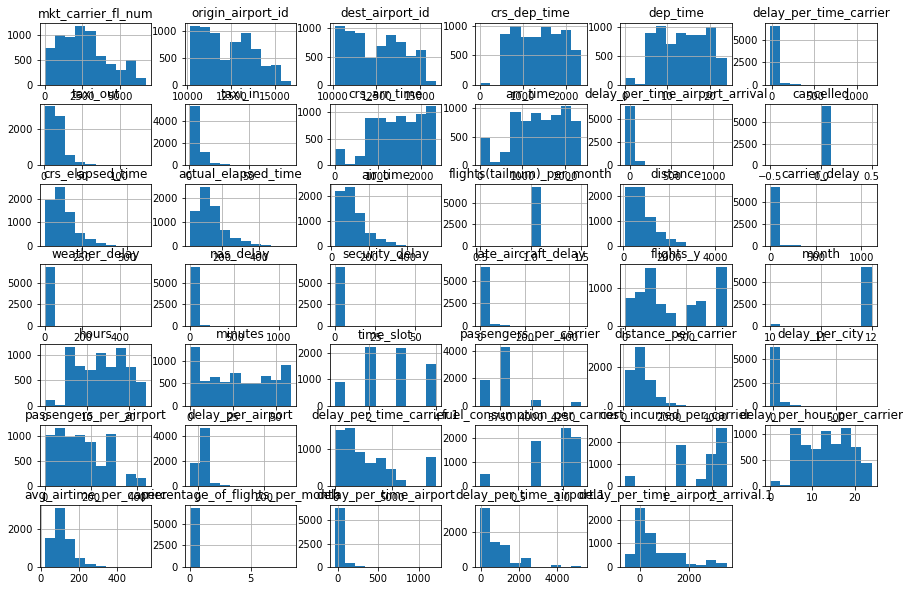

In [70]:
Xtrain.hist(figsize = (15,10))

In [155]:
from sklearn.preprocessing import StandardScaler
X = Xtrain.iloc[:,37:]
Y = Xtest.iloc[:,45:]
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X)
X_test_std = sc.transform(Y)
#
# Perform PCA
#
from sklearn.decomposition import PCA
pca = PCA(10)
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [156]:

my_array = X_train_pca

df22 = pd.DataFrame(my_array)
df22

,0,1,2,3,4,5,6,7,8,9
0,1.078696,-0.714995,0.479545,1.142946,0.775887,1.897284,-0.581501,2.293810,1.681257,0.519710
1,-2.512433,3.177295,0.791730,2.911808,-0.388674,1.575983,-0.984081,-2.100940,0.696813,0.624379
2,1.466069,1.308459,-0.872850,0.915371,2.456937,-0.601461,0.503645,-1.691431,0.817216,-0.432328
3,0.185143,-1.251963,0.397972,-0.040369,0.443554,0.537649,-0.144297,0.694463,1.092782,0.343180
4,-0.412044,-1.166565,0.464908,-0.526535,0.906818,0.387030,0.153467,-0.273399,0.583089,0.543046
...,...,...,...,...,...,...,...,...,...,...
6871,0.504855,1.210109,1.562377,-1.080033,0.332446,-1.442689,0.400613,0.163148,1.784711,-0.514790
6872,-1.672018,-0.786947,0.399015,0.954906,1.605138,-0.291543,-0.078578,0.793948,0.084128,0.777297
6873,-2.006129,-1.641368,-0.873542,1.281451,0.525433,-1.383152,0.661134,0.198962,0.408350,-0.095454
6874,-1.995587,-1.913176,-1.044613,1.487202,0.482185,-1.304231,0.657117,0.208837,0.400386,-0.100181


In [157]:
my_array = X_test_pca

df23 = pd.DataFrame(my_array)
df23

,0,1,2,3,4,5,6,7,8,9
0,6.592294e+07,5.649556e+07,-1.150849e+08,1.801548e+07,-1.650409e+08,-2.007337e+08,1.196897e+07,4.300023e+07,1.337414e+08,-1.679742e+08
1,6.592294e+07,5.649556e+07,-1.150849e+08,1.801548e+07,-1.650409e+08,-2.007337e+08,1.196896e+07,4.300023e+07,1.337414e+08,-1.679742e+08
2,6.592290e+07,5.649563e+07,-1.150849e+08,1.801552e+07,-1.650410e+08,-2.007336e+08,1.196950e+07,4.300027e+07,1.337414e+08,-1.679742e+08
3,6.063348e+07,5.196257e+07,-1.058509e+08,1.656999e+07,-1.517986e+08,-1.846275e+08,1.100882e+07,3.955005e+07,1.230104e+08,-1.544965e+08
4,5.743204e+07,4.921892e+07,-1.002619e+08,1.569508e+07,-1.437836e+08,-1.748792e+08,1.042739e+07,3.746179e+07,1.165155e+08,-1.463390e+08
...,...,...,...,...,...,...,...,...,...,...
2946,7.172108e+07,6.146450e+07,-1.252070e+08,1.959998e+07,-1.795567e+08,-2.183889e+08,1.302148e+07,4.678222e+07,1.455044e+08,-1.827480e+08
2947,7.172106e+07,6.146453e+07,-1.252070e+08,1.960000e+07,-1.795568e+08,-2.183889e+08,1.302173e+07,4.678224e+07,1.455044e+08,-1.827480e+08
2948,6.624984e+06,5.677632e+06,-1.156560e+07,1.810514e+06,-1.658604e+07,-2.017293e+07,1.203164e+06,4.321403e+06,1.344051e+07,-1.688078e+07
2949,6.624976e+06,5.677648e+06,-1.156560e+07,1.810524e+06,-1.658606e+07,-2.017291e+07,1.203280e+06,4.321411e+06,1.344052e+07,-1.688078e+07


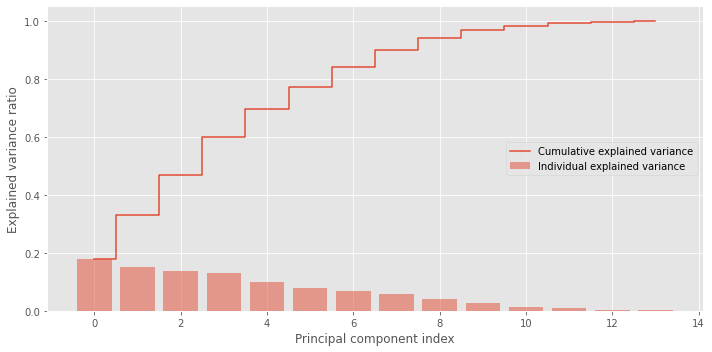

In [160]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
arr_red = pca.fit_transform(df_scaled)

# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
f, ax = plt.subplots(figsize=(10,5))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right')
plt.tight_layout()
plt.savefig('screeplot.png')
plt.show()

In [169]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:8]

array([17.99, 33.19, 46.76, 59.84, 69.63, 77.33, 84.16, 89.91])